In [13]:
# !pip install seaborn
# !pip install umap
# !pip install kagglehub

In [14]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("hojjatk/mnist-dataset")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\dell\.cache\kagglehub\datasets\hojjatk\mnist-dataset\versions\1


In [15]:
#
# This is a sample Notebook to demonstrate how to read "MNIST Dataset"
#
import numpy as np # linear algebra
import struct
from array import array
from os.path  import join

#
# MNIST Data Loader Class
#
class MnistDataloader(object):
    def __init__(self, training_images_filepath,training_labels_filepath,
                 test_images_filepath, test_labels_filepath):
        self.training_images_filepath = training_images_filepath
        self.training_labels_filepath = training_labels_filepath
        self.test_images_filepath = test_images_filepath
        self.test_labels_filepath = test_labels_filepath
    
    def read_images_labels(self, images_filepath, labels_filepath):        
        labels = []
        with open(labels_filepath, 'rb') as file:
            magic, size = struct.unpack(">II", file.read(8))
            if magic != 2049:
                raise ValueError('Magic number mismatch, expected 2049, got {}'.format(magic))
            labels = array("B", file.read())        
        
        with open(images_filepath, 'rb') as file:
            magic, size, rows, cols = struct.unpack(">IIII", file.read(16))
            if magic != 2051:
                raise ValueError('Magic number mismatch, expected 2051, got {}'.format(magic))
            image_data = array("B", file.read())        
        images = []
        for i in range(size):
            images.append([0] * rows * cols)
        for i in range(size):
            img = np.array(image_data[i * rows * cols:(i + 1) * rows * cols])
            img = img.reshape(28, 28)
            images[i][:] = img            
        
        return images, labels
            
    def load_data(self):
        x_train, y_train = self.read_images_labels(self.training_images_filepath, self.training_labels_filepath)
        x_test, y_test = self.read_images_labels(self.test_images_filepath, self.test_labels_filepath)
        return (x_train, y_train),(x_test, y_test)   

In [16]:
input_path = path
training_images_filepath = join(input_path, 'train-images-idx3-ubyte/train-images-idx3-ubyte')
training_labels_filepath = join(input_path, 'train-labels-idx1-ubyte/train-labels-idx1-ubyte')
test_images_filepath = join(input_path, 't10k-images-idx3-ubyte/t10k-images-idx3-ubyte')
test_labels_filepath = join(input_path, 't10k-labels-idx1-ubyte/t10k-labels-idx1-ubyte')

#
# Helper function to show a list of images with their relating titles
#
def show_images(images, title_texts):
    cols = 5
    rows = int(len(images)/cols) + 1
    plt.figure(figsize=(30,20))
    index = 1    
    for x in zip(images, title_texts):        
        image = x[0]        
        title_text = x[1]
        plt.subplot(rows, cols, index)        
        plt.imshow(image, cmap=plt.cm.gray)
        if (title_text != ''):
            plt.title(title_text, fontsize = 15);        
        index += 1

In [17]:
#
# Load MINST dataset
#
mnist_dataloader = MnistDataloader(training_images_filepath, training_labels_filepath, test_images_filepath, test_labels_filepath)
(x_train, y_train), (x_test, y_test) = mnist_dataloader.load_data()

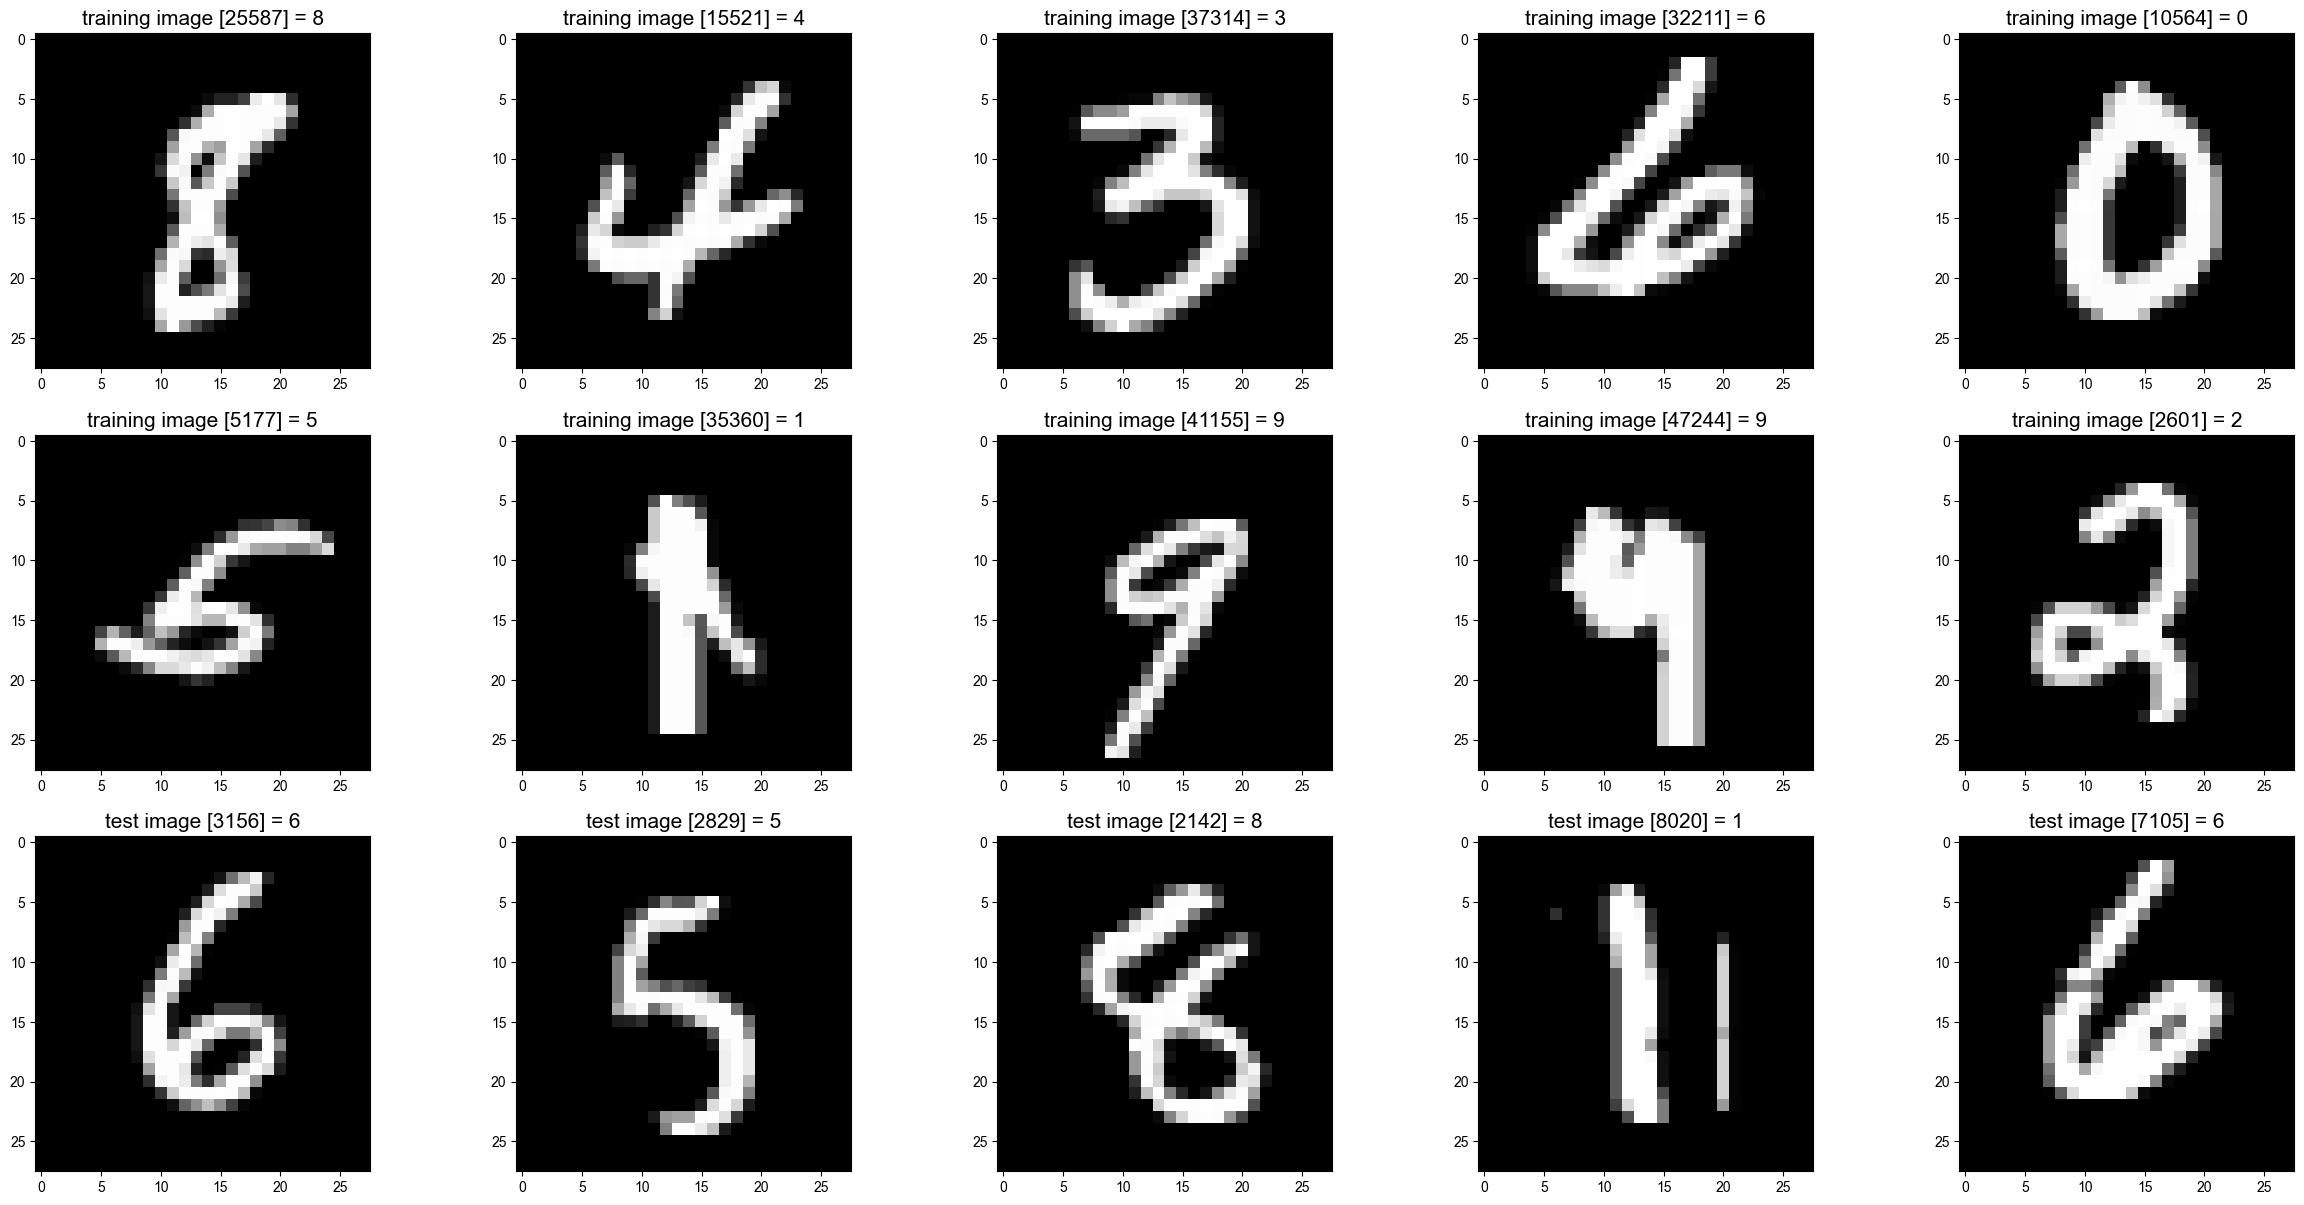

In [18]:


#
# Verify Reading Dataset via MnistDataloader class
#
%matplotlib inline
import random
import matplotlib.pyplot as plt

def show_images(images, title_texts):
    cols = 5
    rows = int(len(images)/cols) + 1
    plt.figure(figsize=(30,20))
    index = 1    
    for x in zip(images, title_texts):        
        image = x[0]        
        title_text = x[1]
        plt.subplot(rows, cols, index)        
        plt.imshow(image, cmap=plt.cm.gray)
        if (title_text != ''):
            plt.title(title_text, fontsize = 15);        
        index += 1

#
# Load MINST dataset
#
mnist_dataloader = MnistDataloader(training_images_filepath, training_labels_filepath, test_images_filepath, test_labels_filepath)
(x_train, y_train), (x_test, y_test) = mnist_dataloader.load_data()

#
# Show some random training and test images 
#
images_2_show = []
titles_2_show = []
for i in range(0, 10):
    r = random.randint(1, 60000)
    images_2_show.append(x_train[r])
    titles_2_show.append('training image [' + str(r) + '] = ' + str(y_train[r]))    

for i in range(0, 5):
    r = random.randint(1, 10000)
    images_2_show.append(x_test[r])        
    titles_2_show.append('test image [' + str(r) + '] = ' + str(y_test[r]))    

show_images(images_2_show, titles_2_show)



In [19]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris, load_digits, make_swiss_roll
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
import umap
#from tensorflow.keras.datasets import mnist, fashion_mnist



# 1. IRIS
iris = load_iris()
X_iris = StandardScaler().fit_transform(iris.data)


# 2. Digits
digits = load_digits()
X_digits = StandardScaler().fit_transform(digits.data)


# 3. Swiss Roll
X_swiss, t_swiss = make_swiss_roll(n_samples=2000, noise=0.2, random_state=42)


## IRIS

In [20]:
import numpy as np
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.manifold import Isomap
from sklearn.manifold import LocallyLinearEmbedding
import umap

In [21]:
cdict = {0: 'red', 1: 'blue', 2: 'green'}
colors = np.array([cdict[xi] for xi in iris.target])

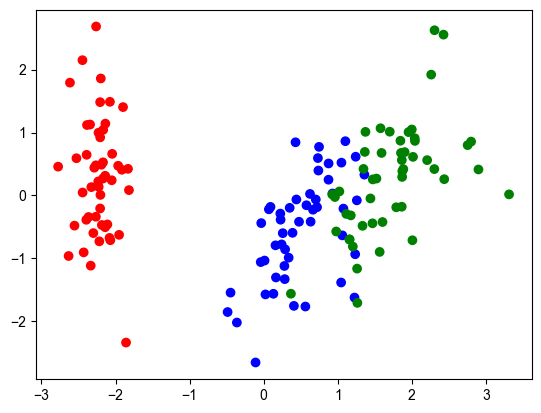

In [22]:
pca = PCA(n_components=2)
pca = pca.fit(X_iris)
X_iris_PCA_transform = pca.transform(X_iris)


plt.scatter(X_iris_PCA_transform[:,0], X_iris_PCA_transform[:,1],
            color = colors)
plt.show()

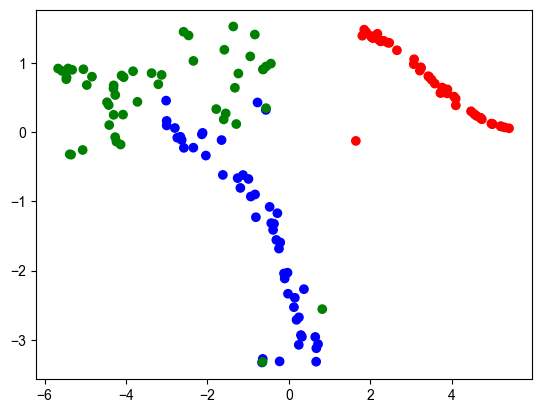

In [23]:
tsne = TSNE(n_components=2, learning_rate=0.01, init='random', perplexity=30)
X_iris_tsne_transform = tsne.fit_transform(X_iris)
plt.scatter(X_iris_tsne_transform[:,0], X_iris_tsne_transform[:,1],
            color = colors)
plt.show()

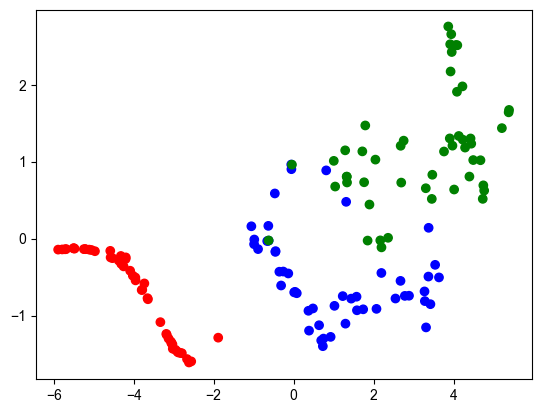

In [24]:
isomap = Isomap(n_components=2)
X_iris_isomap_transform = tsne.fit_transform(X_iris)
plt.scatter(X_iris_isomap_transform[:,0], X_iris_isomap_transform[:,1],
            color = colors)
plt.show()

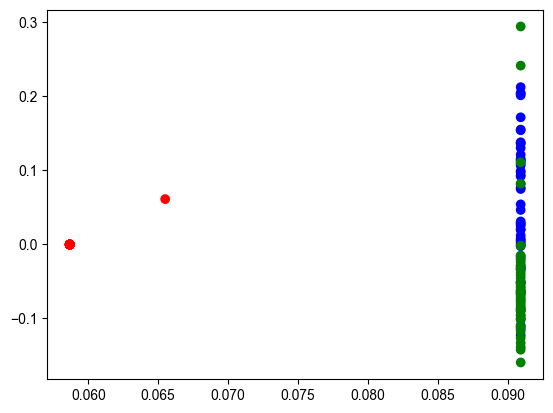

In [25]:
lle = LocallyLinearEmbedding(n_components=2)
X_iris_lle_transform = lle.fit_transform(X_iris)
plt.scatter(X_iris_lle_transform[:,0], X_iris_lle_transform[:,1],
            color = colors)
plt.show()

C:\Users\dell\Documents\AK\MFoDL\.idea\VirtualEnvironment\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


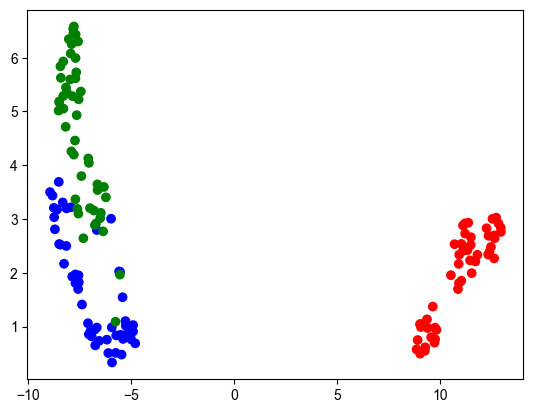

In [26]:
myumap = umap.UMAP()
X_iris_myumap_transform = myumap.fit_transform(X_iris)
plt.scatter(X_iris_myumap_transform[:,0], X_iris_myumap_transform[:,1],
            color = colors)
plt.show()

C:\Users\dell\Documents\AK\MFoDL\.idea\VirtualEnvironment\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\dell\AppData\Local\Temp\ipykernel_17100\3994721784.py:21: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


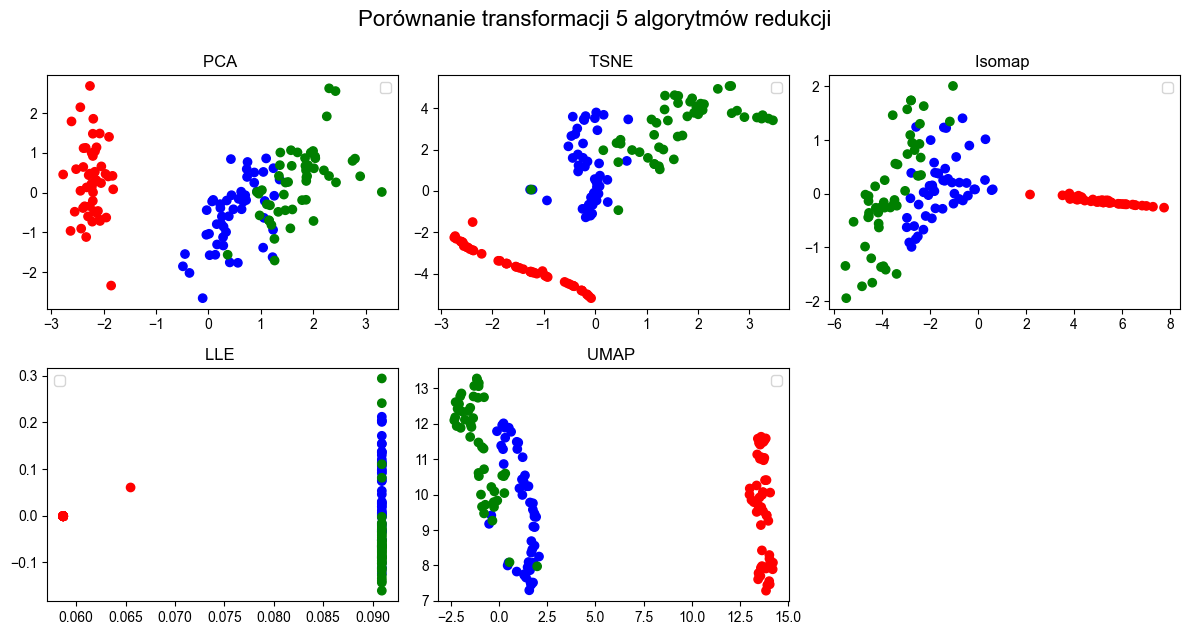

In [27]:
models = {
    "PCA": PCA(n_components=2),
    "TSNE": TSNE(n_components=2, learning_rate=0.01, init='random', perplexity=30),
    "Isomap": Isomap(n_components=2),
    "LLE": LocallyLinearEmbedding(n_components=2),
    "UMAP": umap.UMAP()
}

X_transformed ={}

for name, model in models.items():
    X_transformed_ = model.fit_transform(X_iris)
    X_transformed[name] = X_transformed_

plt.figure(figsize=(12, 6))
for idx, (name, X_transformed_) in enumerate(X_transformed.items(), 1):
    plt.subplot(2, 3, idx)
    plt.scatter(X_transformed_[:,0], X_transformed_[:,1],
            color = colors)
    plt.title(f"{name} ")
    plt.legend()

plt.tight_layout()
plt.suptitle("Porównanie transformacji 5 algorytmów redukcji", fontsize=16, y=1.05)
plt.show()

In [75]:
def make_experiment(data, labels, colors, models=None):
    if models is None:
        models = {
            "PCA": PCA(n_components=2),
            "TSNE": TSNE(n_components=2, learning_rate="auto", init='random', perplexity=3),
            "Isomap": Isomap(n_components=2),
            "LLE": LocallyLinearEmbedding(n_components=2),
            "UMAP": umap.UMAP()
        }
    
    X_transformed ={}
    
    for name, model in models.items():
        X_transformed_ = model.fit_transform(data)
        X_transformed[name] = X_transformed_
    
    plt.figure(figsize=(12, 6))
    for idx, (name, X_transformed_) in enumerate(X_transformed.items(), 1):
        plt.subplot(2, 3, idx)
        plt.scatter(X_transformed_[:,0], X_transformed_[:,1],
                color = colors, label = labels)
        plt.title(f"{name} ")
        plt.legend()
    
    plt.tight_layout()
    plt.suptitle("Porównanie transformacji 5 algorytmów redukcji", fontsize=16, y=1.05)
    plt.show()

In [72]:
colors = plt.get_cmap('tab10').colors  # 'tab10' zawiera 10 unikalnych kolorów
color_dict = {i: colors[i] for i in range(10)}

C:\Users\dell\Documents\AK\MFoDL\.idea\VirtualEnvironment\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\dell\AppData\Local\Temp\ipykernel_17100\4179221930.py:22: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


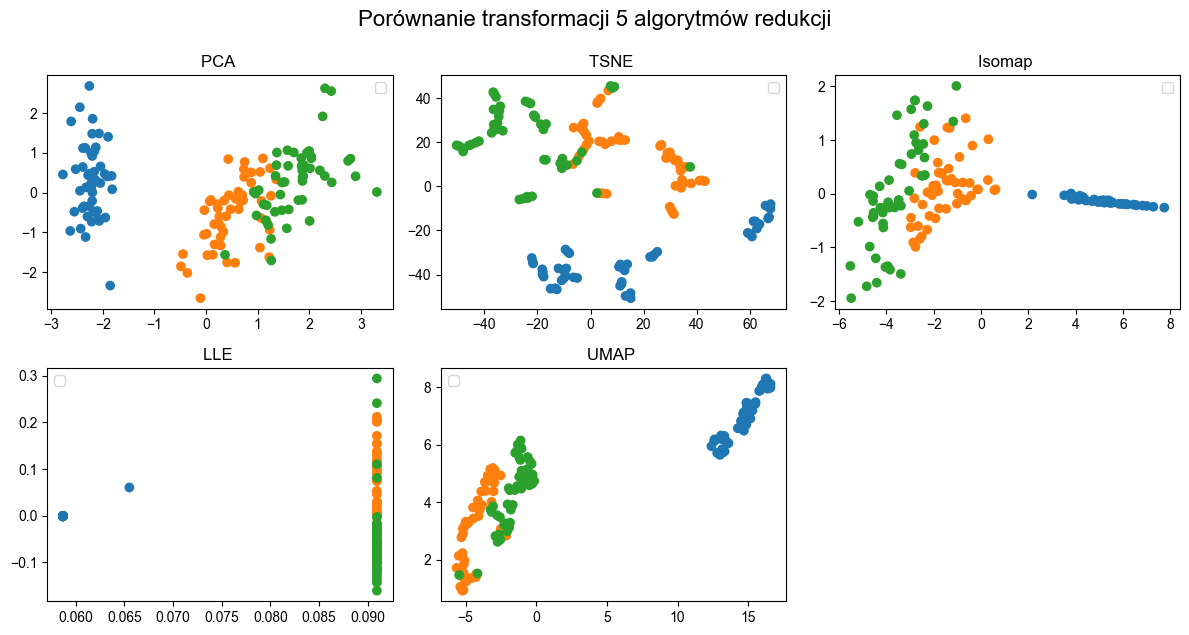

In [73]:
colors = np.array([color_dict[xi] for xi in iris.target])
make_experiment(X_iris,None, colors)

C:\Users\dell\Documents\AK\MFoDL\.idea\VirtualEnvironment\Lib\site-packages\sklearn\manifold\_isomap.py:384: UserWarning: The number of connected components of the neighbors graph is 2 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.
  self._fit_transform(X)
C:\Users\dell\Documents\AK\MFoDL\.idea\VirtualEnvironment\Lib\site-packages\scipy\sparse\_index.py:168: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil and dok are more efficient.
  self._set_intXint(row, col, x.flat[0])
C:\Users\dell\AppData\Local\Temp\ipykernel_17100\1018447810.py:23: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


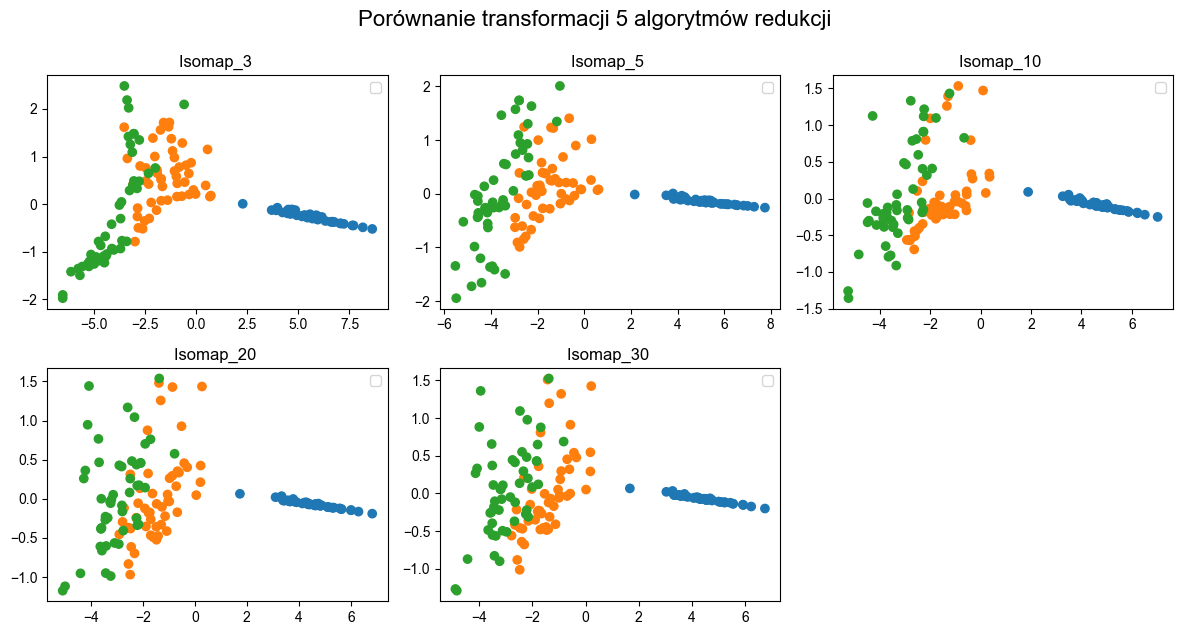

In [78]:
models = {        
}
for i in [3,5,10,20,30]:
    models[f"Isomap_{i}"] =  Isomap(n_components=2, n_neighbors=i)
colors = np.array([color_dict[xi] for xi in iris.target])
make_experiment(X_iris,None, colors,models)

C:\Users\dell\AppData\Local\Temp\ipykernel_17100\1018447810.py:23: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


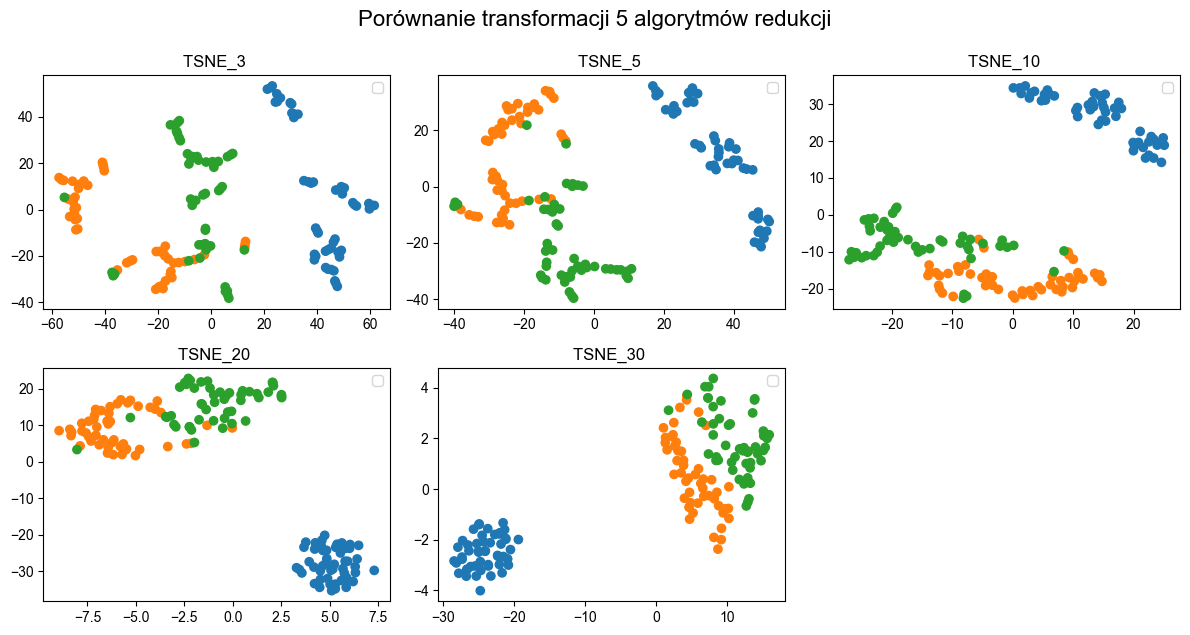

In [79]:
models = {        
}
for i in [3,5,10,20,30]:
    models[f"TSNE_{i}"] = TSNE(n_components=2, learning_rate="auto", init='random', perplexity=i)
colors = np.array([color_dict[xi] for xi in iris.target])
make_experiment(X_iris,None, colors,models)

C:\Users\dell\Documents\AK\MFoDL\.idea\VirtualEnvironment\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\dell\Documents\AK\MFoDL\.idea\VirtualEnvironment\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\dell\Documents\AK\MFoDL\.idea\VirtualEnvironment\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\dell\Documents\AK\MFoDL\.idea\VirtualEnvironment\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\dell\Documents\AK\MFoDL\.idea\VirtualEnvironment\Lib\site-packages\

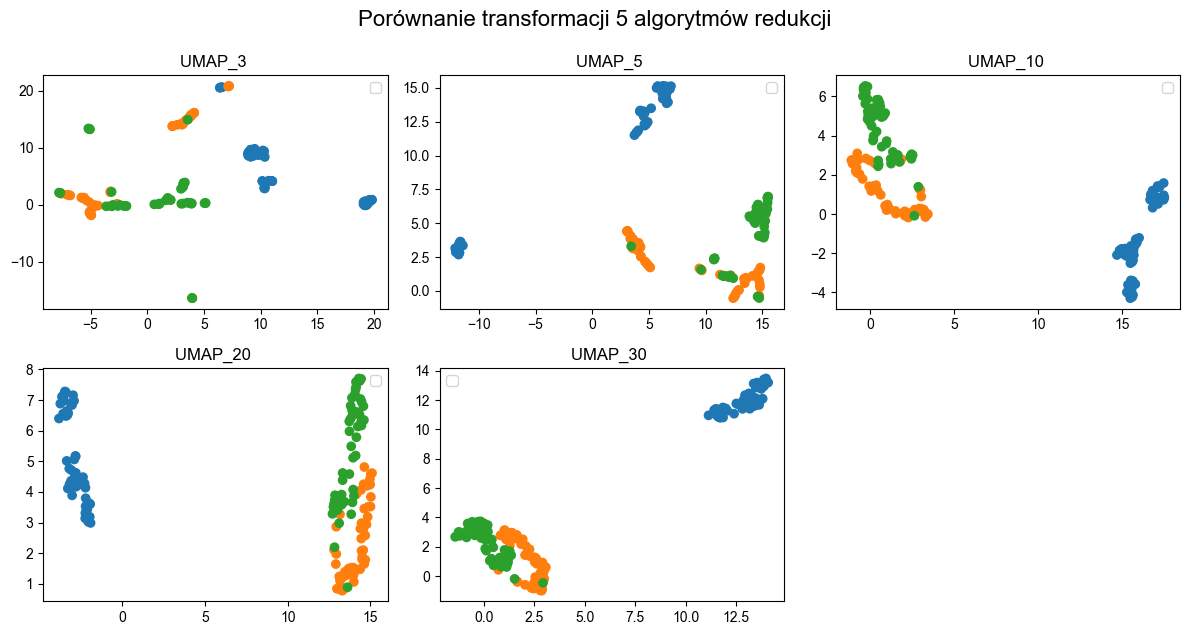

In [81]:
models = {        
}
for i in [3,5,10,20,30]:
    models[f"UMAP_{i}"] = umap.UMAP(n_components=2,  n_neighbors=i)
colors = np.array([color_dict[xi] for xi in iris.target])
make_experiment(X_iris,None, colors,models)

C:\Users\dell\Documents\AK\MFoDL\.idea\VirtualEnvironment\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\dell\AppData\Local\Temp\ipykernel_17100\1833404408.py:22: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


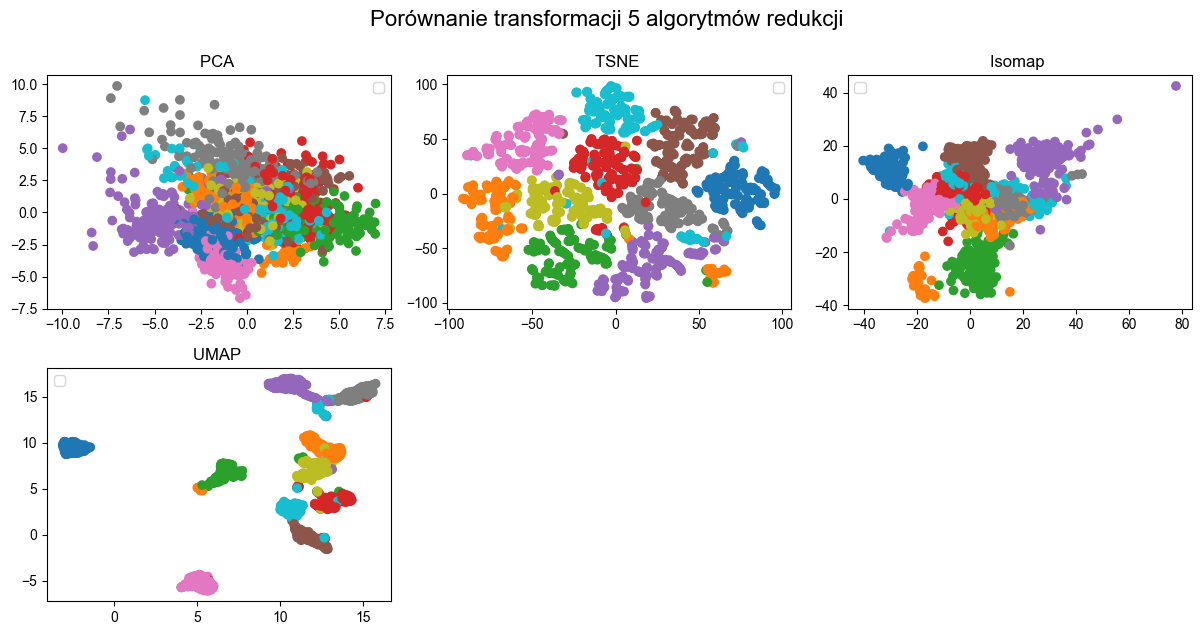

In [31]:
colors = np.array([color_dict[xi] for xi in digits.target])
make_experiment(X_digits, None, colors)

C:\Users\dell\AppData\Local\Temp\ipykernel_17100\1018447810.py:23: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


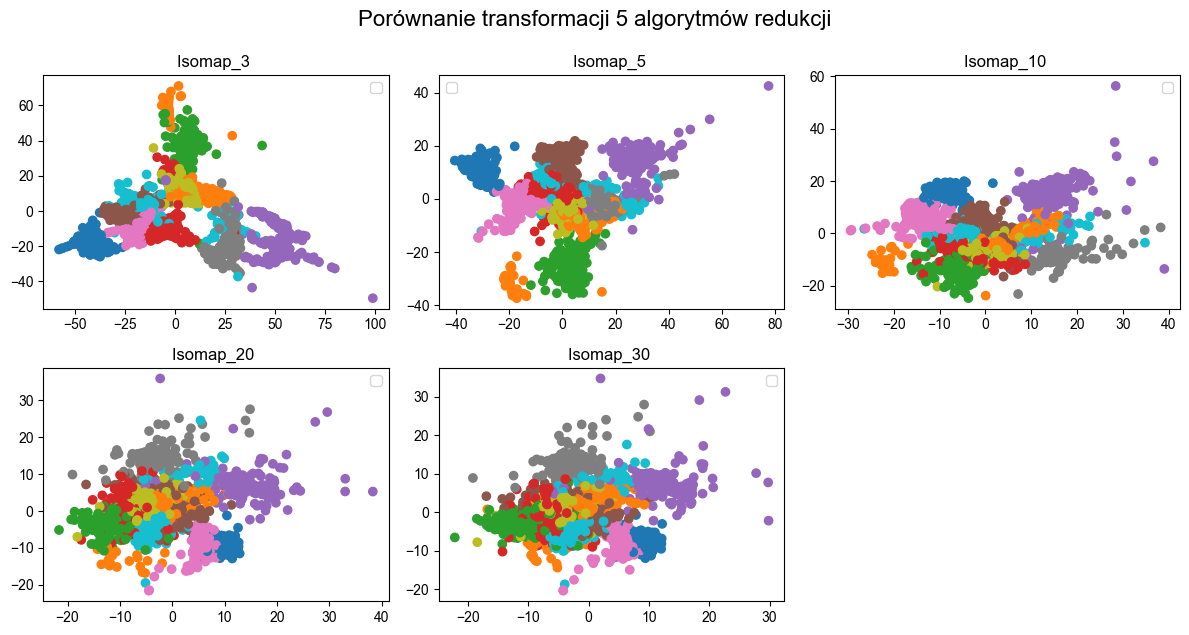

In [82]:
models = {        
}
for i in [3,5,10,20,30]:
    models[f"Isomap_{i}"] =  Isomap(n_components=2, n_neighbors=i)
colors = np.array([color_dict[xi] for xi in digits.target])
make_experiment(X_digits, None, colors,models)

C:\Users\dell\AppData\Local\Temp\ipykernel_17100\1018447810.py:23: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


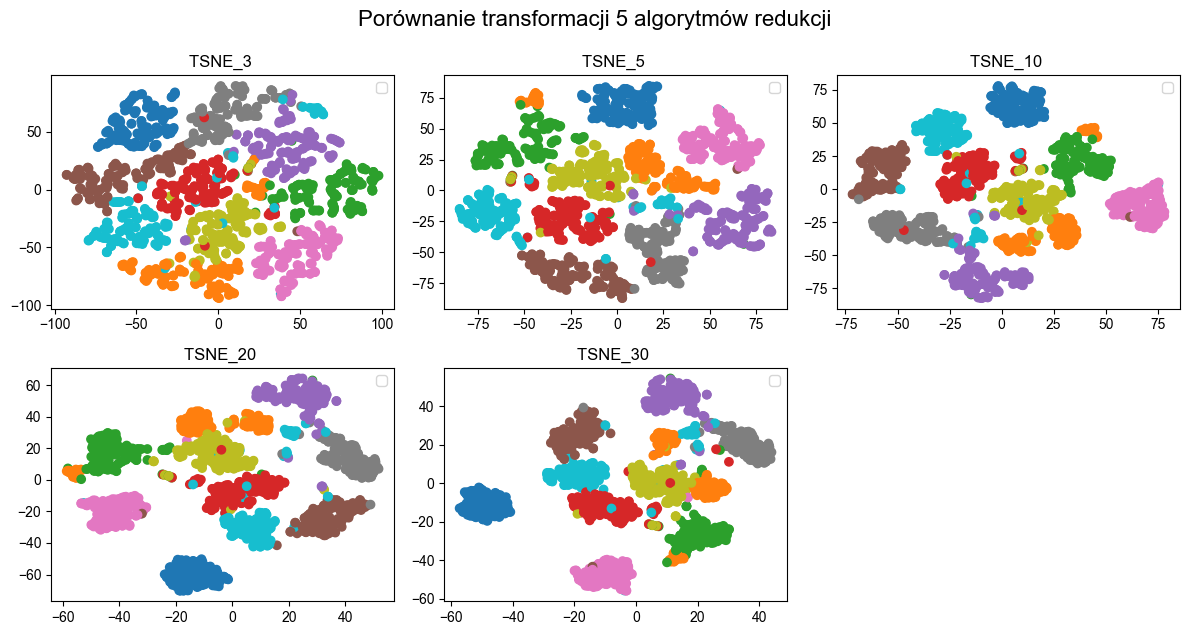

In [83]:
models = {        
}
for i in [3,5,10,20,30]:
    models[f"TSNE_{i}"] = TSNE(n_components=2, learning_rate="auto", init='random', perplexity=i)
colors = np.array([color_dict[xi] for xi in digits.target])
make_experiment(X_digits, None, colors,models)

C:\Users\dell\Documents\AK\MFoDL\.idea\VirtualEnvironment\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\dell\Documents\AK\MFoDL\.idea\VirtualEnvironment\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\dell\Documents\AK\MFoDL\.idea\VirtualEnvironment\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\dell\Documents\AK\MFoDL\.idea\VirtualEnvironment\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\dell\Documents\AK\MFoDL\.idea\VirtualEnvironment\Lib\site-packages\

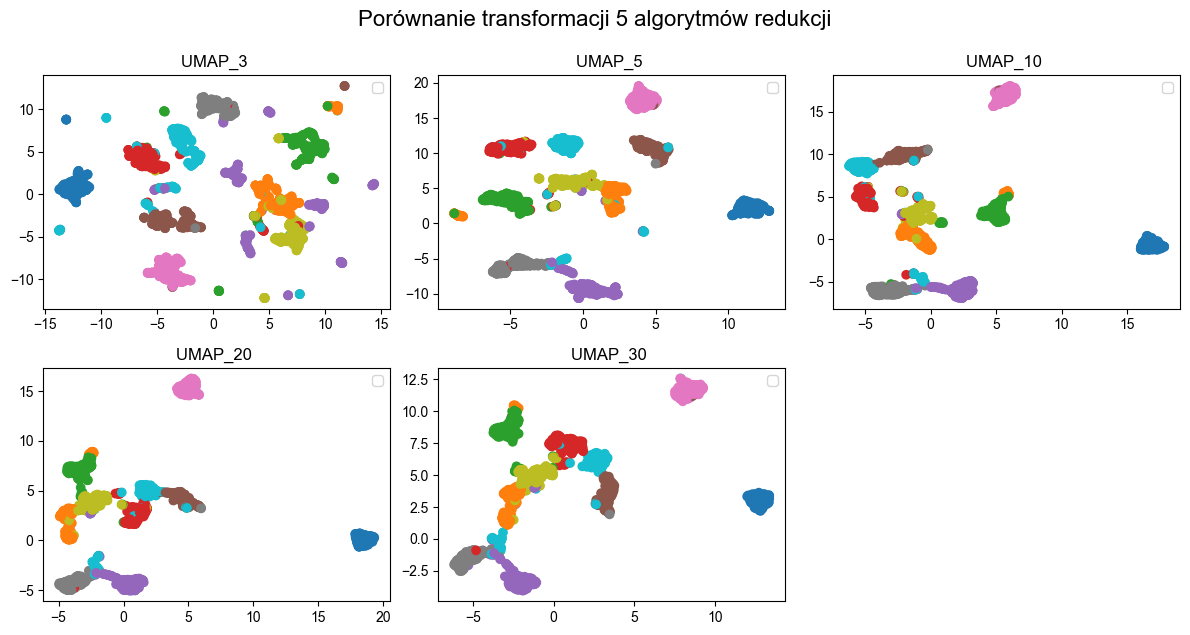

In [84]:
models = {        
}
for i in [3,5,10,20,30]:
    models[f"UMAP_{i}"] = umap.UMAP(n_components=2,  n_neighbors=i)
colors = np.array([color_dict[xi] for xi in digits.target])
make_experiment(X_digits, None, colors,models)

In [86]:
import logging
logger = logging.getLogger()
logger.setLevel(logging.CRITICAL)

C:\Users\dell\AppData\Local\Temp\ipykernel_17100\1691377982.py:10: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  sc = ax.scatter(X_swiss[:,0],X_swiss[:,1],X_swiss[:,2], c=colors, cmap='viridis', s=60)


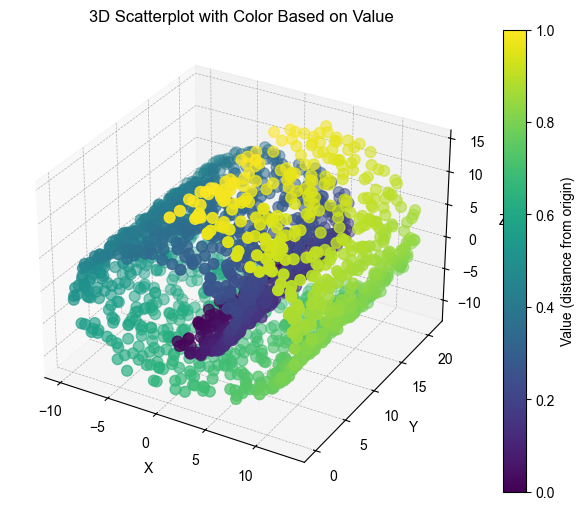

C:\Users\dell\Documents\AK\MFoDL\.idea\VirtualEnvironment\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\dell\AppData\Local\Temp\ipykernel_17100\1018447810.py:23: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


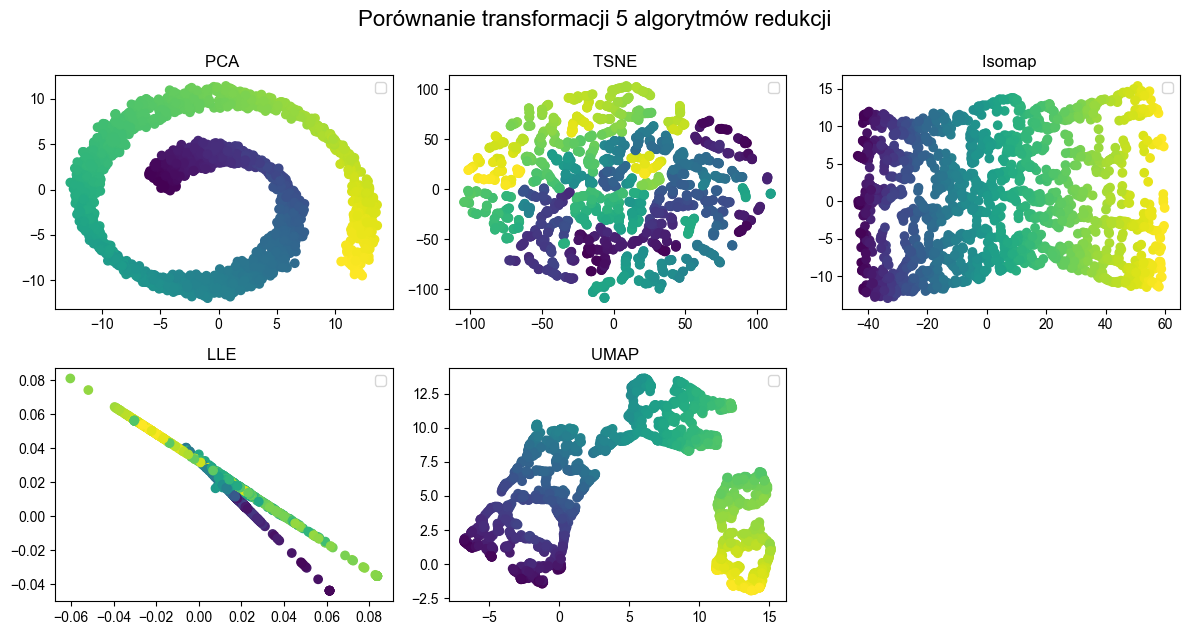

C:\Users\dell\Documents\AK\MFoDL\.idea\VirtualEnvironment\Lib\site-packages\sklearn\manifold\_isomap.py:384: UserWarning: The number of connected components of the neighbors graph is 3 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.
  self._fit_transform(X)
C:\Users\dell\Documents\AK\MFoDL\.idea\VirtualEnvironment\Lib\site-packages\scipy\sparse\_index.py:168: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil and dok are more efficient.
  self._set_intXint(row, col, x.flat[0])
C:\Users\dell\Documents\AK\MFoDL\.idea\VirtualEnvironment\Lib\site-packages\scipy\sparse\_index.py:168: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil and dok are more efficient.
  self._set_intXint(row, col, x.flat[0])
C:\Users\dell\Documents\AK\MFoDL\.idea\VirtualEnvironment\Lib\site-packages\scipy\sparse\_index.py:168: SparseEfficiencyWarning: Changing the sparsity st

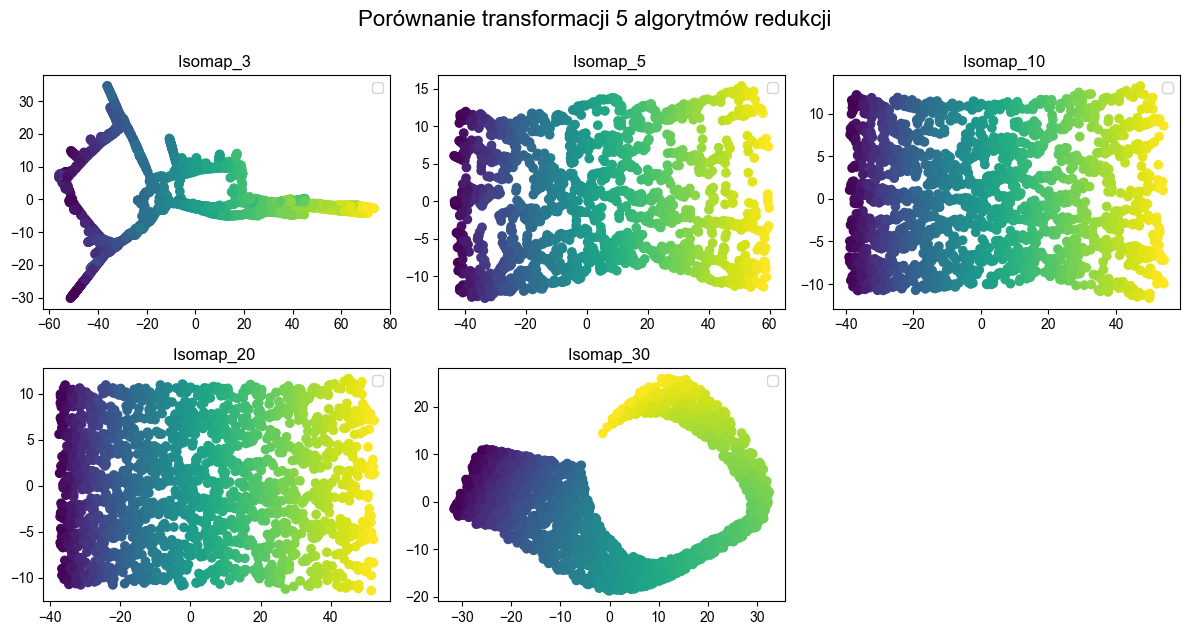

C:\Users\dell\AppData\Local\Temp\ipykernel_17100\1018447810.py:23: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


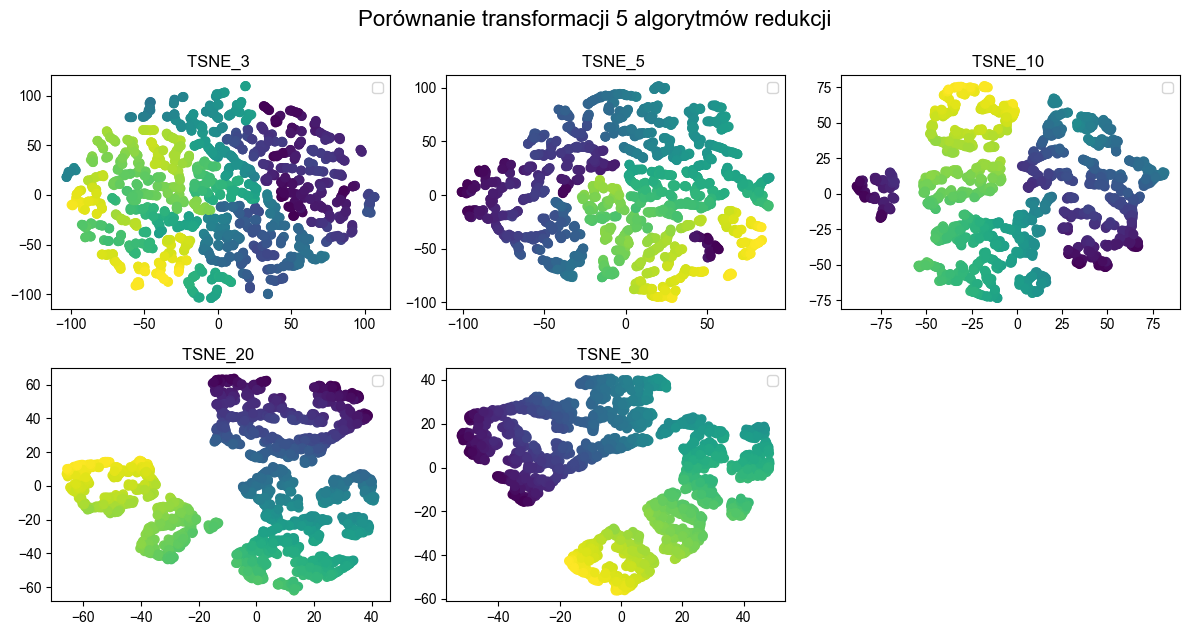

C:\Users\dell\Documents\AK\MFoDL\.idea\VirtualEnvironment\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\dell\Documents\AK\MFoDL\.idea\VirtualEnvironment\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\dell\Documents\AK\MFoDL\.idea\VirtualEnvironment\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\dell\Documents\AK\MFoDL\.idea\VirtualEnvironment\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\dell\Documents\AK\MFoDL\.idea\VirtualEnvironment\Lib\site-packages\

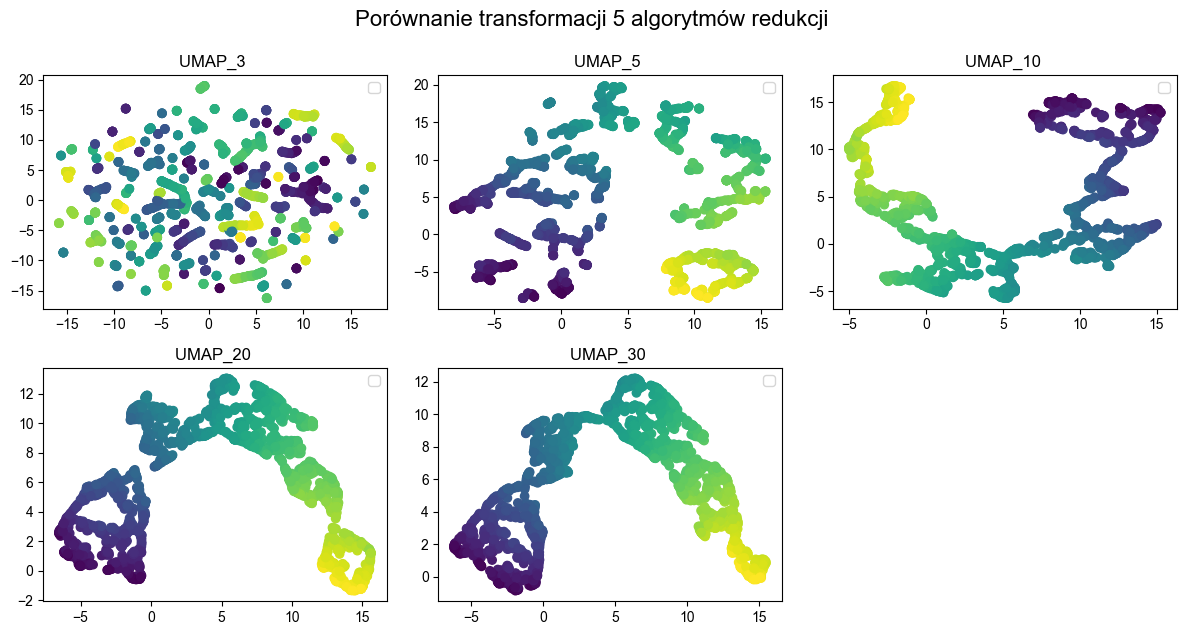

In [91]:
from matplotlib.colors import Normalize
from matplotlib import cm
norm = Normalize(vmin=t_swiss.min(), vmax=t_swiss.max())
cmap = cm.viridis  # Możesz zmienić na plasma, inferno, turbo itd.
colors = cmap(norm(t_swiss))
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

# Użycie colormap do kolorowania punktów
sc = ax.scatter(X_swiss[:,0],X_swiss[:,1],X_swiss[:,2], c=colors, cmap='viridis', s=60)

# Oznaczenia osi i kolor
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
fig.colorbar(sc, ax=ax, label='Value (distance from origin)')

plt.title("3D Scatterplot with Color Based on Value")
plt.show()

make_experiment(X_swiss, None, colors)
models ={}
for i in [3,5,10,20,30]:
    models[f"Isomap_{i}"] =  Isomap(n_components=2, n_neighbors=i)
make_experiment(X_swiss, None, colors,models)
models ={}
for i in [3,5,10,20,30]:
    models[f"TSNE_{i}"] = TSNE(n_components=2, learning_rate="auto", init='random', perplexity=i)
make_experiment(X_swiss, None, colors,models)
models ={}
for i in [3,5,10,20,30]:
    models[f"UMAP_{i}"] = umap.UMAP(n_components=2,  n_neighbors=i)
make_experiment(X_swiss, None, colors,models)

In [34]:
# Mamut/UMAP-examples-mammoth--master/UMAP-examples-mammoth--master/mammoth_a.csv

In [35]:
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier

In [36]:
mammoth = pd.read_csv('./Mamut/UMAP-examples-mammoth--master/UMAP-examples-mammoth--master/mammoth_a.csv')

In [37]:
mammoth = pd.read_csv('./Mamut/UMAP-examples-mammoth--master/UMAP-examples-mammoth--master/rexy_a.csv')

In [38]:
mammoth2 = mammoth.sample(50000)

In [96]:
mammoth.shape

(499470, 3)

In [119]:
# Perform agglomerative clustering on a subset, then scale up with a classifier. Courtesy sb. on StackOverflow. 
from sklearn.cluster import AgglomerativeClustering

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

X_train, X_test, y_train, y_test = \
    train_test_split(mammoth, mammoth, 
                     test_size=490000, random_state=42) 
AC = AgglomerativeClustering(n_clusters=4, linkage='ward')
AC.fit(X_train)
labels = AC.labels_

KN = KNeighborsClassifier(n_neighbors=10)
KN.fit(X_train,labels)
labels2 = KN.predict(mammoth)
col_len = len(set(labels2))-1

In [120]:
labels

array([0, 2, 0, ..., 1, 1, 2], shape=(9470,))

In [121]:
labels22 = KN.predict(mammoth2)

In [122]:
colors = np.array([color_dict[xi%10] for xi in labels2])

In [123]:
import matplotlib as mpl

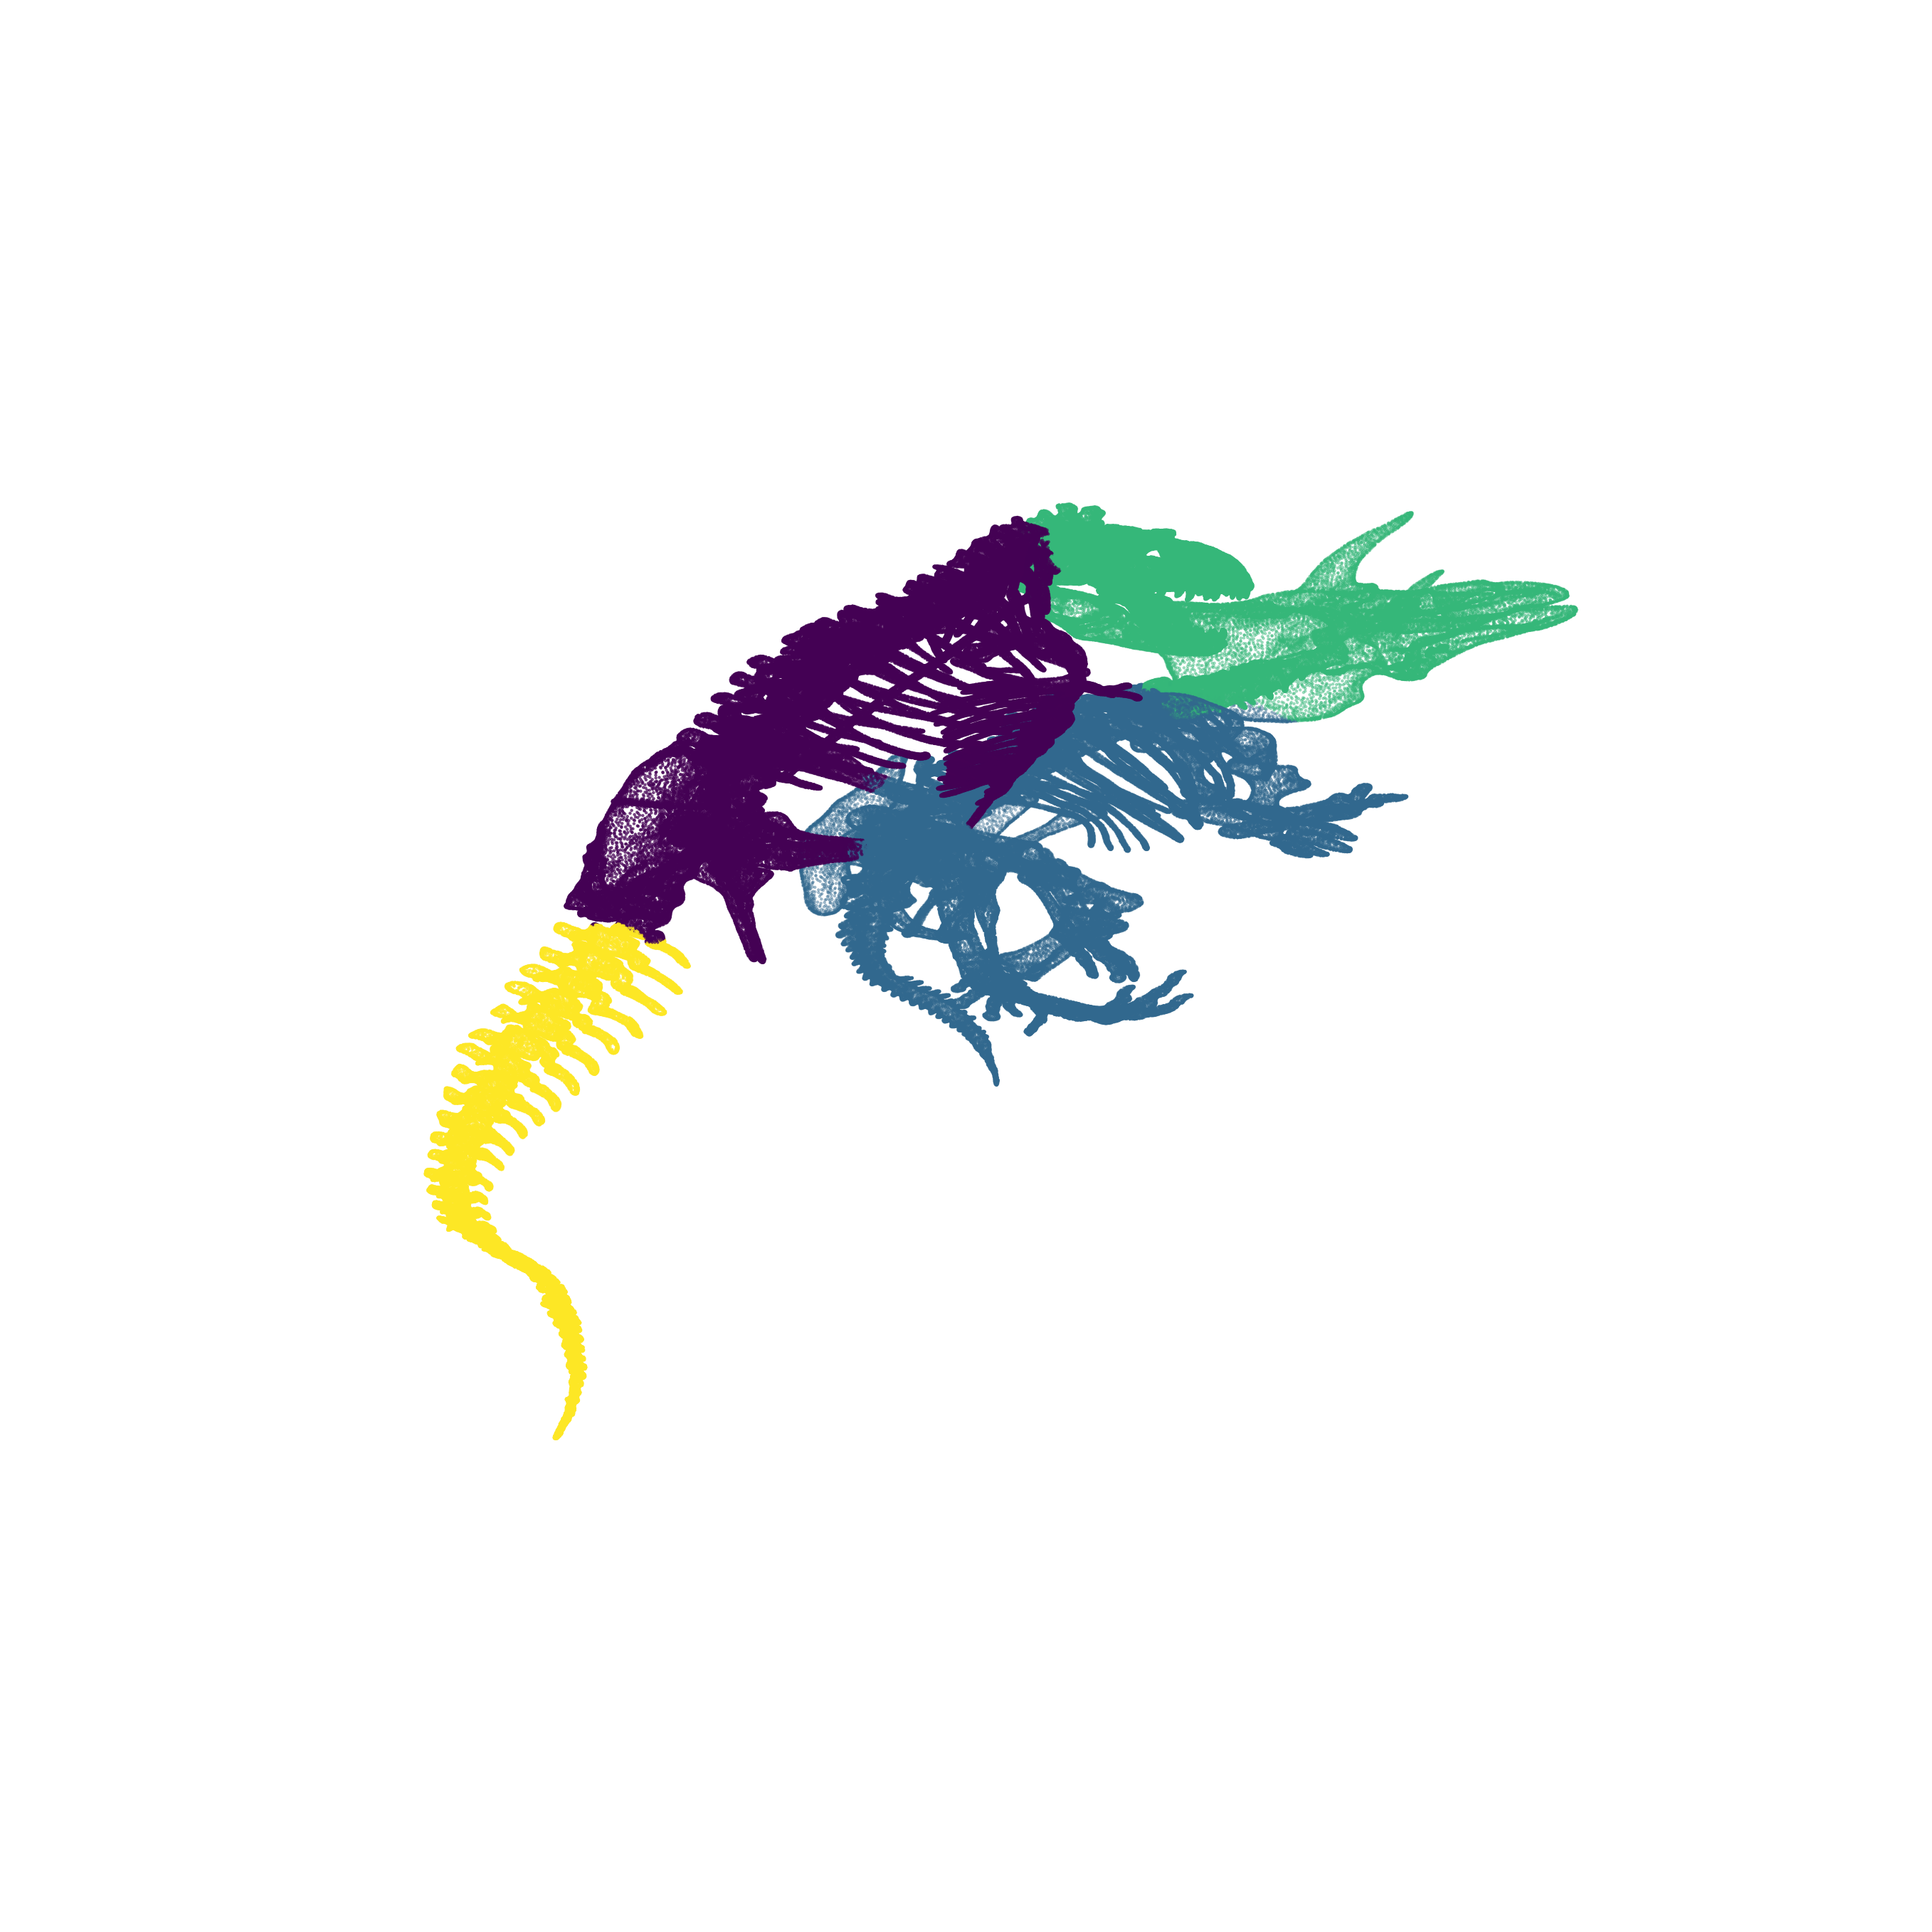

In [124]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(48,35))

ax = fig.add_subplot(111, projection='3d')
# ax.set_aspect('equal')

ax.set_axis_off()
ax.scatter(mammoth['x'], mammoth['y'], mammoth['z'], s=5,c=labels2,cmap=cmap)
ax.view_init(10, -170)

plt.show()

In [125]:
labels2

array([2, 2, 2, ..., 2, 2, 2], shape=(499470,))

In [126]:
mammoth2 = mammoth.sample(50000)

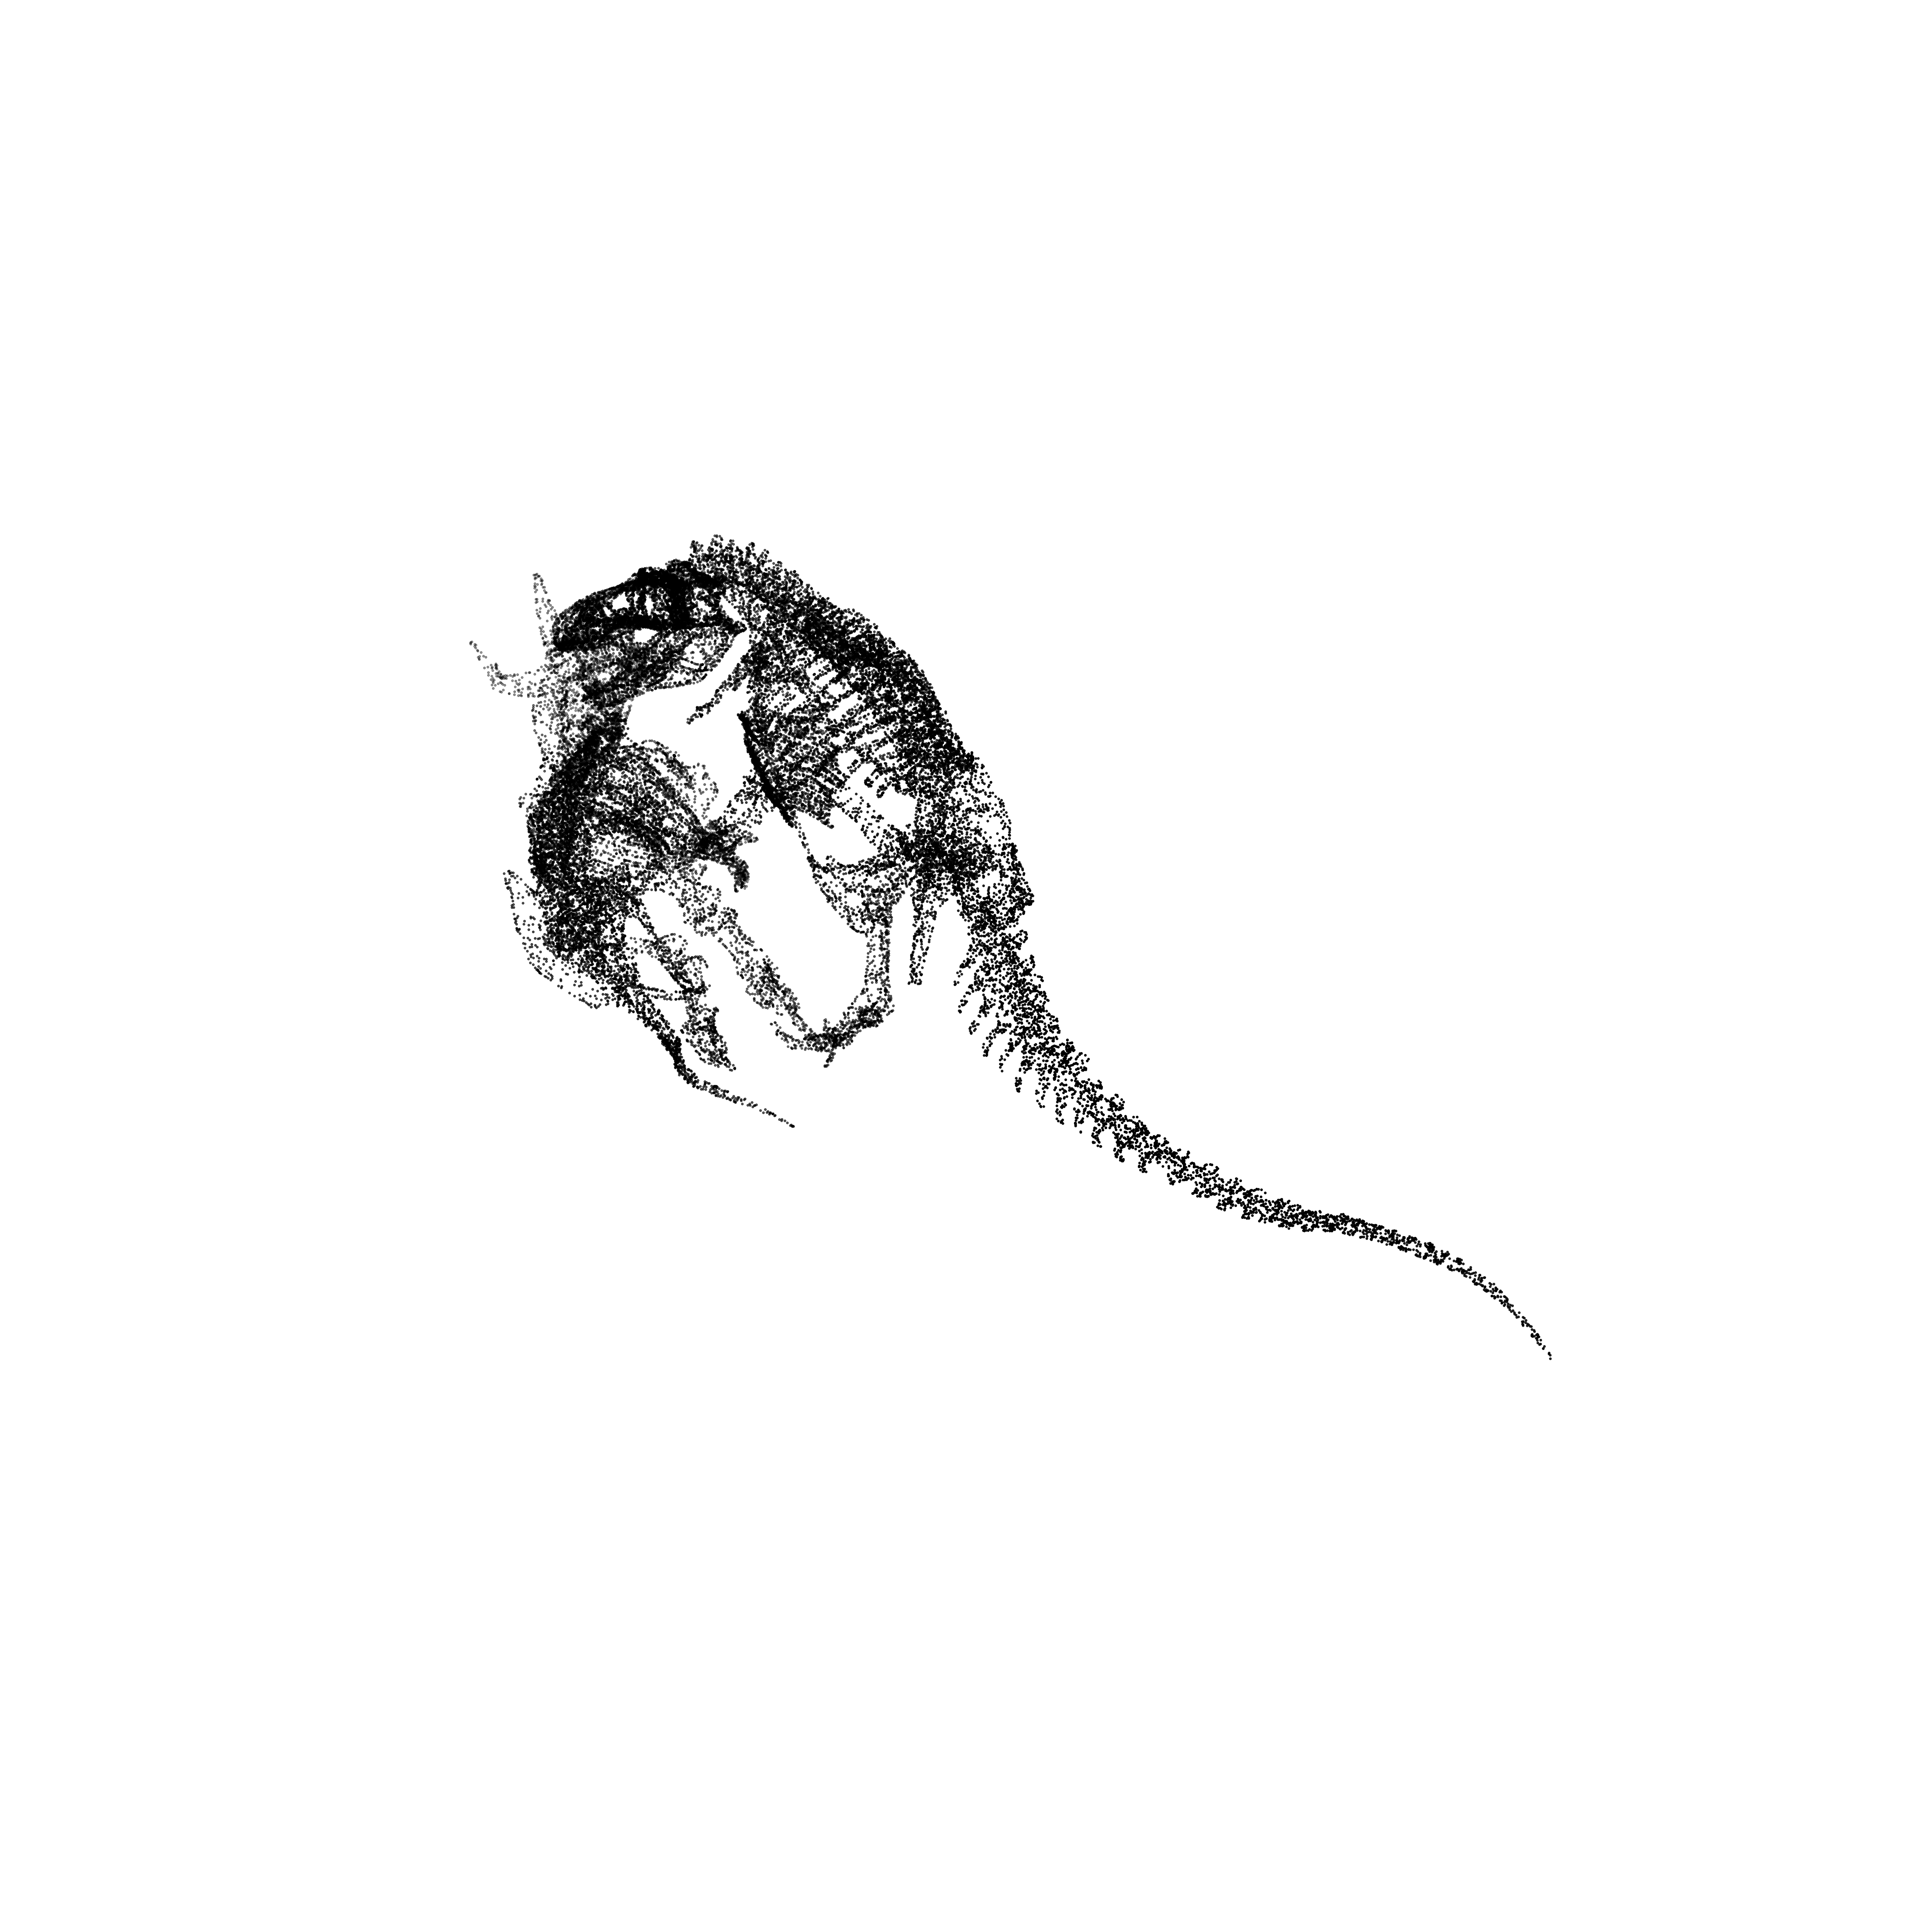

In [127]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(90,72))

ax = fig.add_subplot(111, projection='3d')
# ax.set_aspect('equal')

ax.set_axis_off()
ax.scatter(mammoth2['x'], mammoth2['y'], mammoth2['z'], s=20,c='black')
ax.view_init(0, 90)

plt.show()

In [ ]:
colors = np.array([color_dict[xi%10] for xi in labels22])
make_experiment(mammoth2,None,colors)

C:\Users\dell\Documents\AK\MFoDL\.idea\VirtualEnvironment\Lib\site-packages\sklearn\manifold\_isomap.py:384: UserWarning: The number of connected components of the neighbors graph is 19 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.
  self._fit_transform(X)
C:\Users\dell\Documents\AK\MFoDL\.idea\VirtualEnvironment\Lib\site-packages\scipy\sparse\_index.py:168: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil and dok are more efficient.
  self._set_intXint(row, col, x.flat[0])
C:\Users\dell\Documents\AK\MFoDL\.idea\VirtualEnvironment\Lib\site-packages\scipy\sparse\_index.py:168: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil and dok are more efficient.
  self._set_intXint(row, col, x.flat[0])
C:\Users\dell\Documents\AK\MFoDL\.idea\VirtualEnvironment\Lib\site-packages\scipy\sparse\_index.py:168: SparseEfficiencyWarning: Changing the sparsity s

In [ ]:
n_points =10
phi = np.linspace(0, 2*np.pi, n_points)
theta = np.linspace(0, np.pi, n_points)
theta, phi = np.meshgrid(theta,phi)

In [48]:
p = np.random.randint(0,n_points, size =2) 
np.linspace(-2,2,5)
i, j = np.meshgrid(np.linspace(-2,2,5).astype(int),np.linspace(-2,2,5).astype(int))

In [49]:
theta[p[0] - i.flatten(), p[1] - i.flatten()] = 0*theta[p[0] - i.flatten(), p[1] - i.flatten()]
phi[p[0] - i.flatten(), p[1] - i.flatten()] = 0*phi[p[0] - i.flatten(), p[1] - i.flatten()]

In [50]:
(p[0] - i.flatten()).astype(int)

array([4, 3, 2, 1, 0, 4, 3, 2, 1, 0, 4, 3, 2, 1, 0, 4, 3, 2, 1, 0, 4, 3,
       2, 1, 0])

In [62]:
def make_sphere(r, n_points):
    phi = np.linspace(0, 2*np.pi, n_points)
    theta = np.linspace(0, np.pi, n_points)
    theta, phi = np.meshgrid(theta,phi)
    p = np.random.randint(0,n_points, size =2) 
    i, j = np.meshgrid(np.linspace(-16,16,33).astype(int),np.linspace(-16,16,33).astype(int))
    r_xy = r*np.sin(theta)
    x = np.cos(phi)*r_xy
    y = np.sin(phi)*r_xy
    z = r*np.cos(theta)
    for _ in range(10):
        p = np.random.randint(0,n_points, size =2) 
        i, j = np.meshgrid(np.linspace(-10,10,21).astype(int),np.linspace(-10,10,21).astype(int))
        x[(p[0] - i.flatten())%n_points, (p[1] - j.flatten())%n_points] = 0
        y[(p[0] - i.flatten())%n_points, (p[1] - j.flatten())%n_points] = 0
        z[(p[0] - i.flatten())%n_points, (p[1] - j.flatten())%n_points] = 1
    return np.stack([x.flatten(),y.flatten(),z.flatten()])

In [63]:
sphere = make_sphere(1,100)

In [64]:
sphere.T

array([[ 0.00000000e+00,  0.00000000e+00,  1.00000000e+00],
       [ 3.17279335e-02,  0.00000000e+00,  9.99496542e-01],
       [ 6.34239197e-02,  0.00000000e+00,  9.97986676e-01],
       ...,
       [ 6.34239197e-02, -1.55343800e-17, -9.97986676e-01],
       [ 3.17279335e-02, -7.77110244e-18, -9.99496542e-01],
       [ 1.22464680e-16, -2.99951957e-32, -1.00000000e+00]],
      shape=(10000, 3))

In [65]:
points = sphere[:,0]

In [66]:
dist = np.linalg.norm(sphere.T-points,axis=1)

In [67]:
dist.min()

np.float64(0.0)

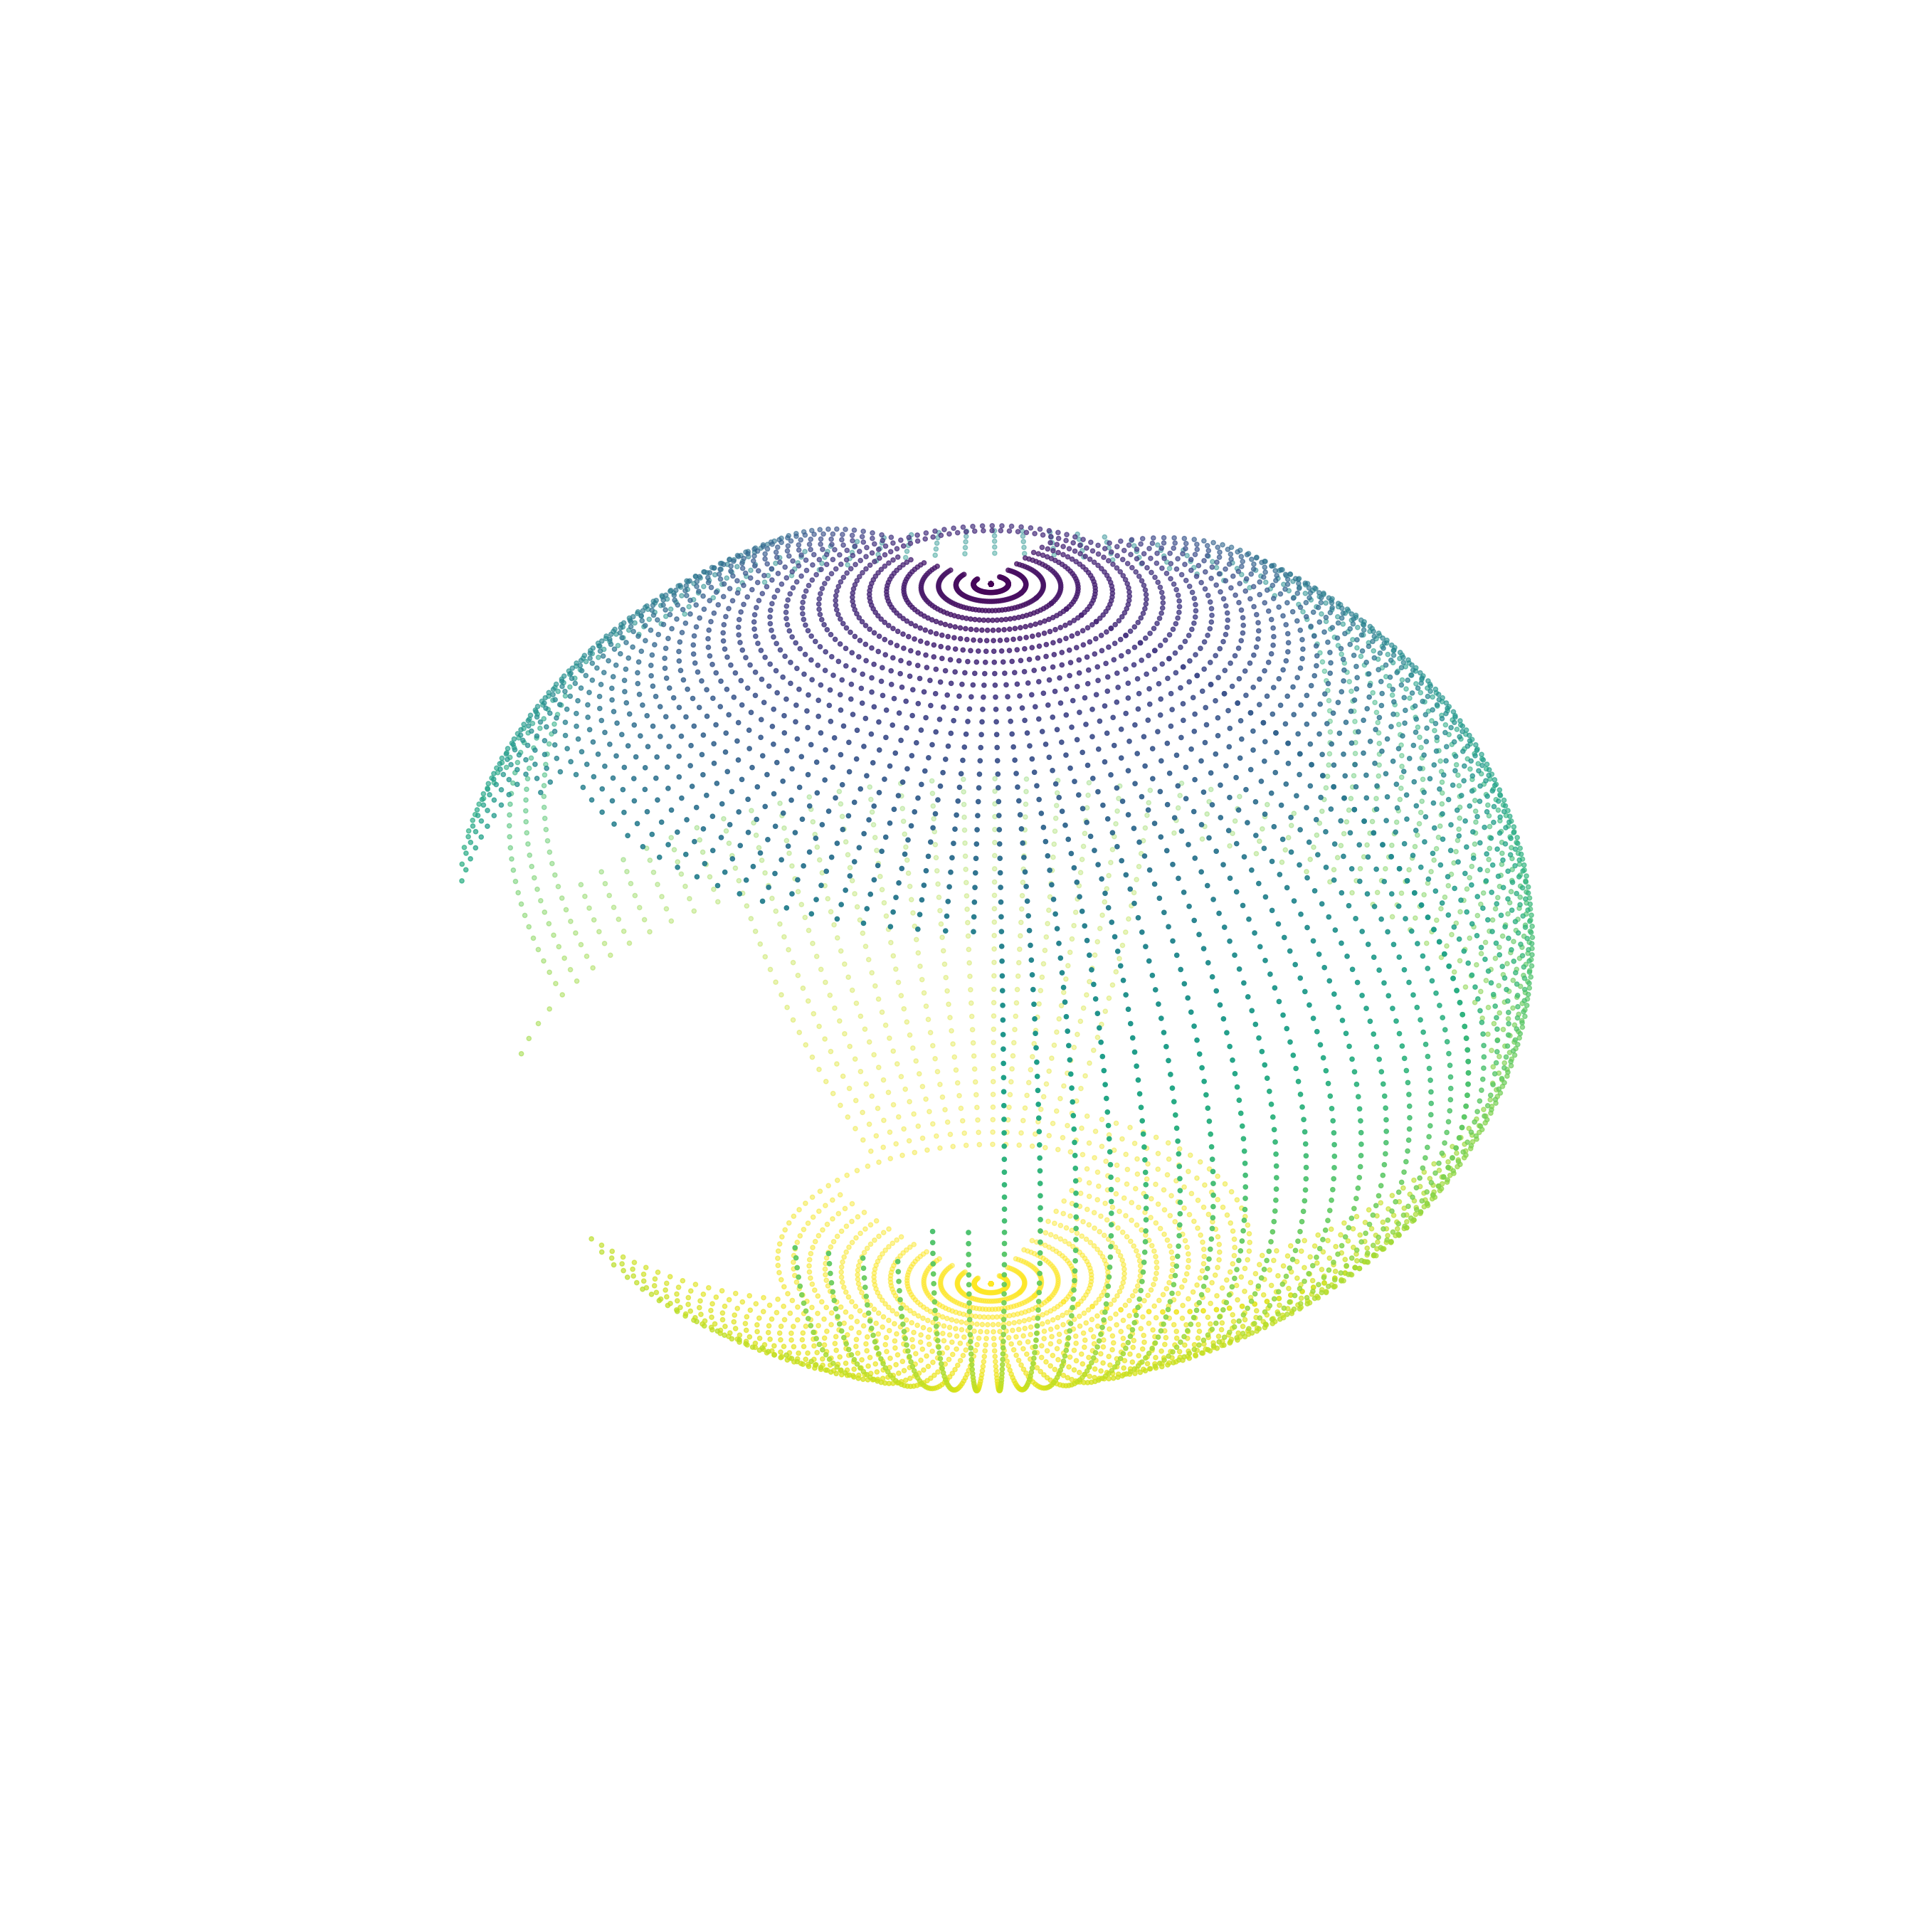

In [68]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(48,35))

ax = fig.add_subplot(111, projection='3d')
# ax.set_aspect('equal')

ax.set_axis_off()
ax.scatter(sphere[0],sphere[1],sphere[2],c =dist,cmap=cmap)
#ax.view_init(0, 0)

plt.show()

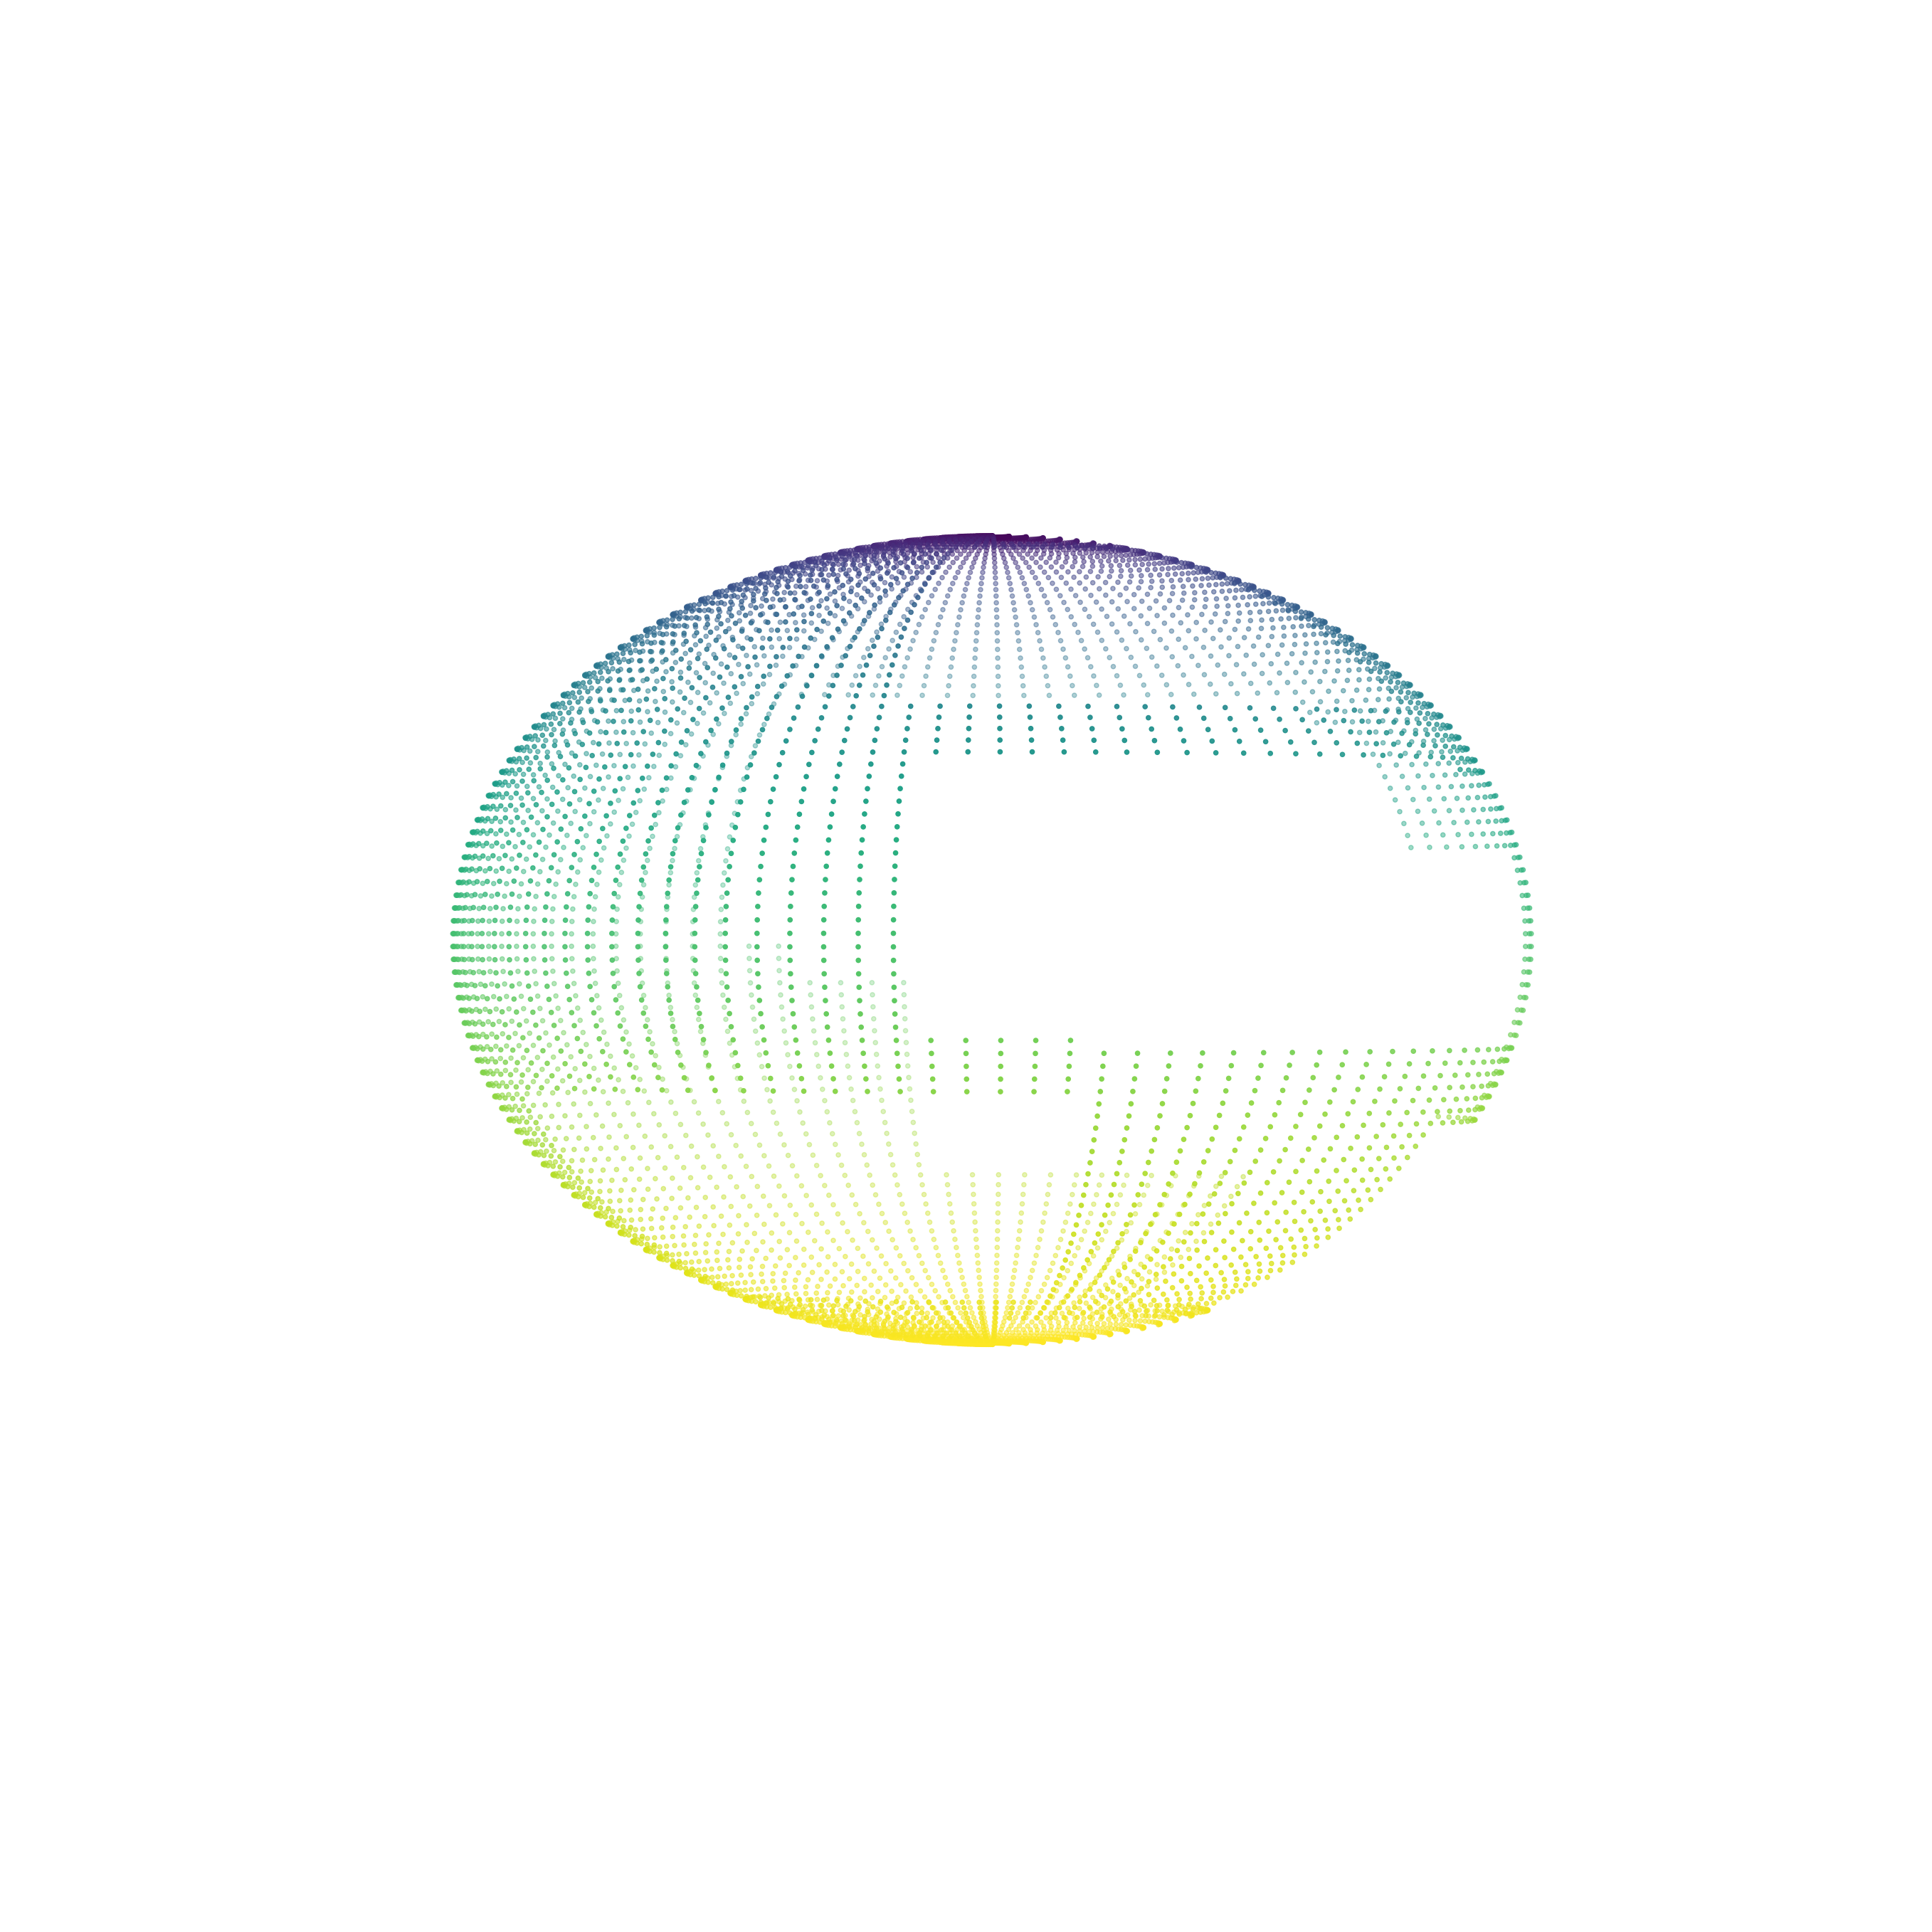

In [69]:
fig = plt.figure(figsize=(48,35))

ax = fig.add_subplot(111, projection='3d')
# ax.set_aspect('equal')

ax.set_axis_off()
ax.scatter(sphere[0],sphere[1],sphere[2],c =dist,cmap=cmap)
ax.view_init(0, 90)

plt.show()

C:\Users\dell\Documents\AK\MFoDL\.idea\VirtualEnvironment\Lib\site-packages\sklearn\manifold\_isomap.py:384: UserWarning: The number of connected components of the neighbors graph is 7 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.
  self._fit_transform(X)
C:\Users\dell\Documents\AK\MFoDL\.idea\VirtualEnvironment\Lib\site-packages\scipy\sparse\_index.py:168: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil and dok are more efficient.
  self._set_intXint(row, col, x.flat[0])
C:\Users\dell\Documents\AK\MFoDL\.idea\VirtualEnvironment\Lib\site-packages\scipy\sparse\_index.py:168: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil and dok are more efficient.
  self._set_intXint(row, col, x.flat[0])
C:\Users\dell\Documents\AK\MFoDL\.idea\VirtualEnvironment\Lib\site-packages\scipy\sparse\_index.py:168: SparseEfficiencyWarning: Changing the sparsity st

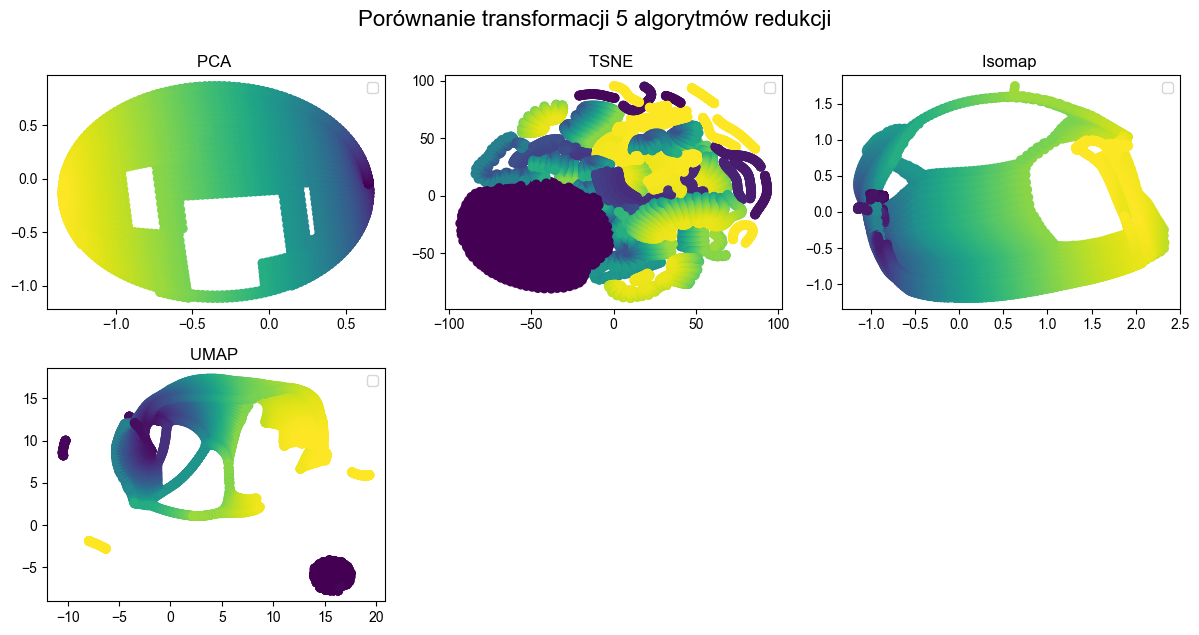

In [70]:
norm = Normalize(vmin=dist.min(), vmax=dist.max())
cmap = cm.viridis  # Możesz zmienić na plasma, inferno, turbo itd.
colors = cmap(norm(dist))
make_experiment(sphere.T,None,colors)